In [1]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

circles_data, circles_data_labels = datasets.make_circles(n_samples=100, factor=0.1, noise=0.1) 

In [2]:
circles_data_labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

# Ploting All Data

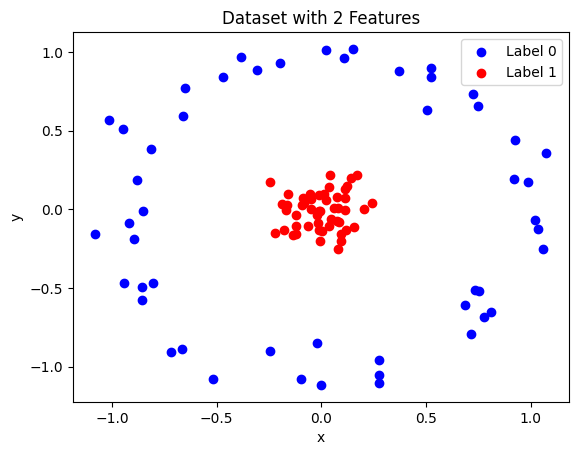

In [3]:

def plot_data(features, labels):
    blue_points = features[labels == 0]
    red_points = features[labels == 1]
    
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Label 0')
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Label 1')
    
    plt.title('Dataset with 2 Features')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

plot_data(circles_data, circles_data_labels)


# Split data into train and test loader

In [4]:
X = torch.Tensor(circles_data)
y = torch.Tensor(circles_data_labels).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

print("Training set size:", len(train_dataset))
print("Test set size:", len(test_dataset))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


Training set size: 70
Test set size: 30


# Model Structure Define

In [5]:
class SimpleNN(nn.Module):
    def __init__(self, channel):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, channel)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(channel, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



In [6]:
circles_data.shape, circles_data_labels.shape

((100, 2), (100,))

In [12]:
model = SimpleNN(7)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels[:,0].long())
        loss.backward()
        optimizer.step()

    if epoch % 10 == 9:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 10/100, Loss: 0.9565560817718506
Epoch 20/100, Loss: 0.7326558232307434
Epoch 30/100, Loss: 0.7099612355232239
Epoch 40/100, Loss: 0.6816038489341736
Epoch 50/100, Loss: 0.6683142185211182
Epoch 60/100, Loss: 0.656465470790863
Epoch 70/100, Loss: 0.6147648692131042
Epoch 80/100, Loss: 0.5607838034629822
Epoch 90/100, Loss: 0.6623488068580627
Epoch 100/100, Loss: 0.6047137379646301


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


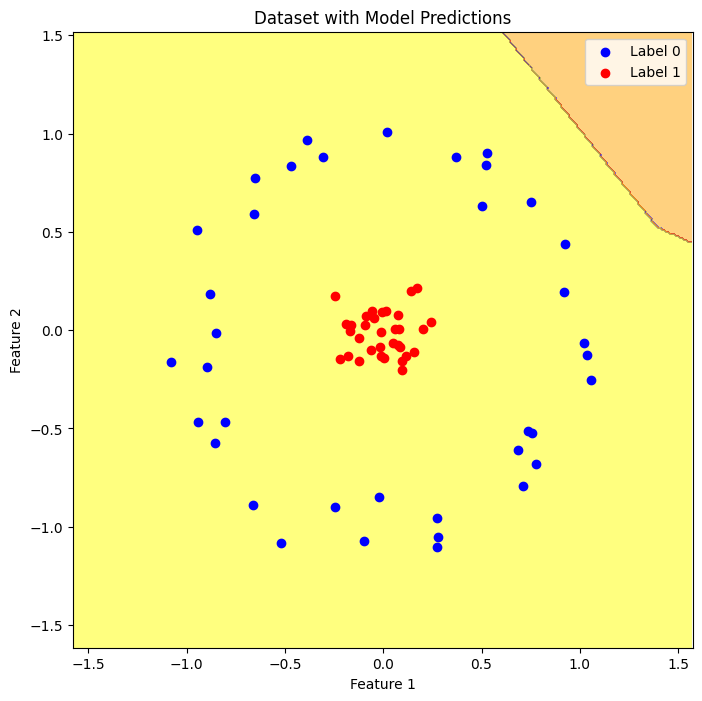

Epoch 10/1000, Loss: 0.7022454142570496
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


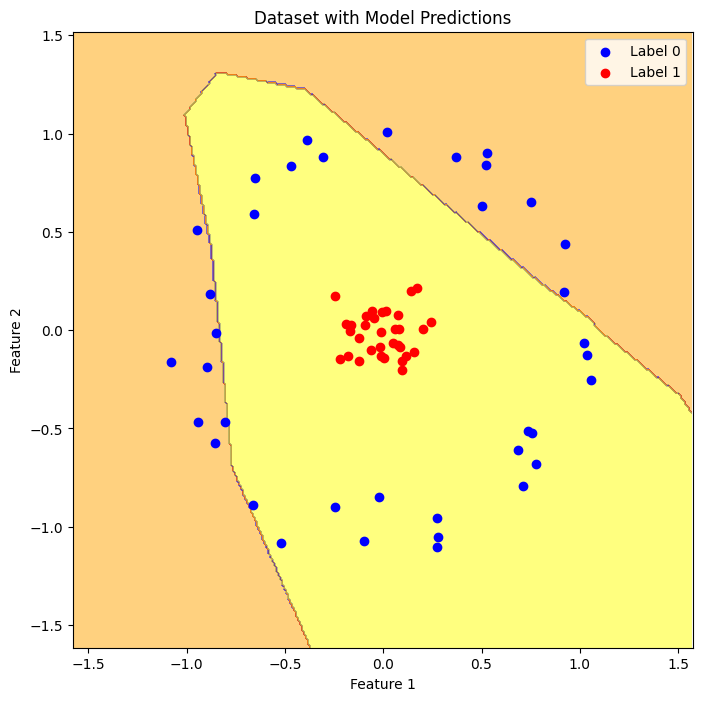

Epoch 20/1000, Loss: 0.67588871717453
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


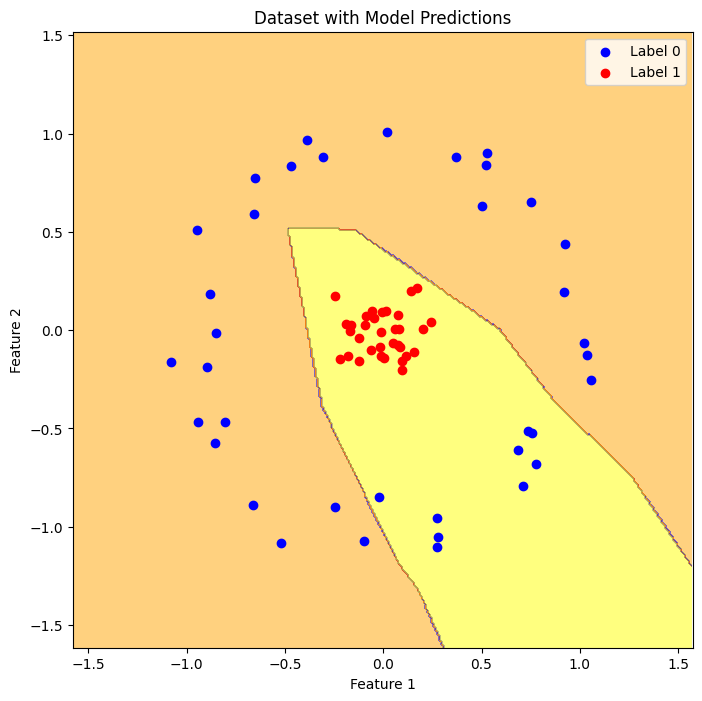

Epoch 30/1000, Loss: 0.6265415549278259
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


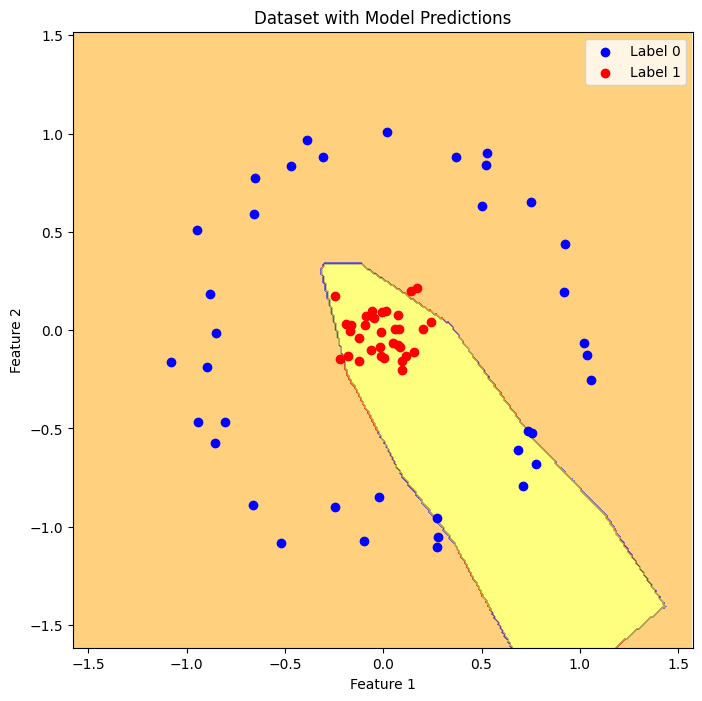

Epoch 40/1000, Loss: 0.6352514624595642
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


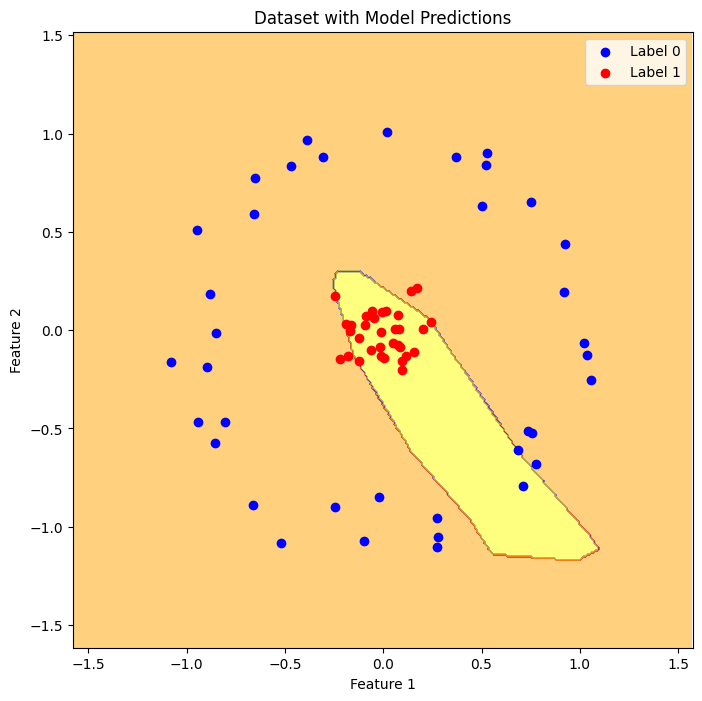

Epoch 50/1000, Loss: 0.6275602579116821
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


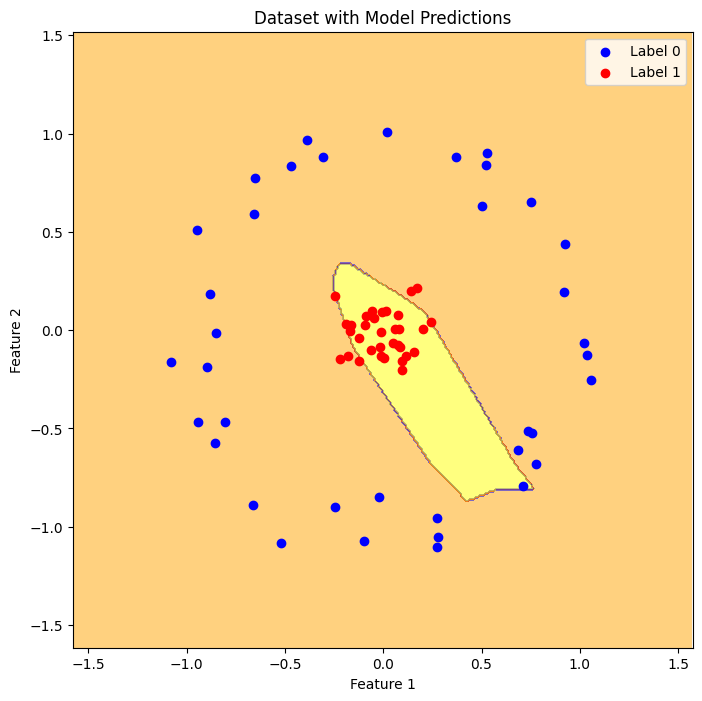

Epoch 60/1000, Loss: 0.5510620474815369
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


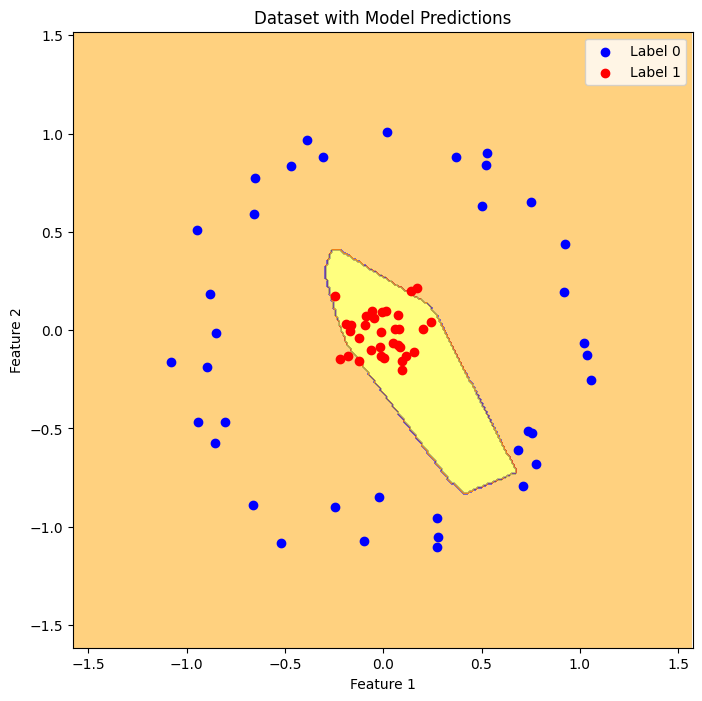

Epoch 70/1000, Loss: 0.5848429799079895
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


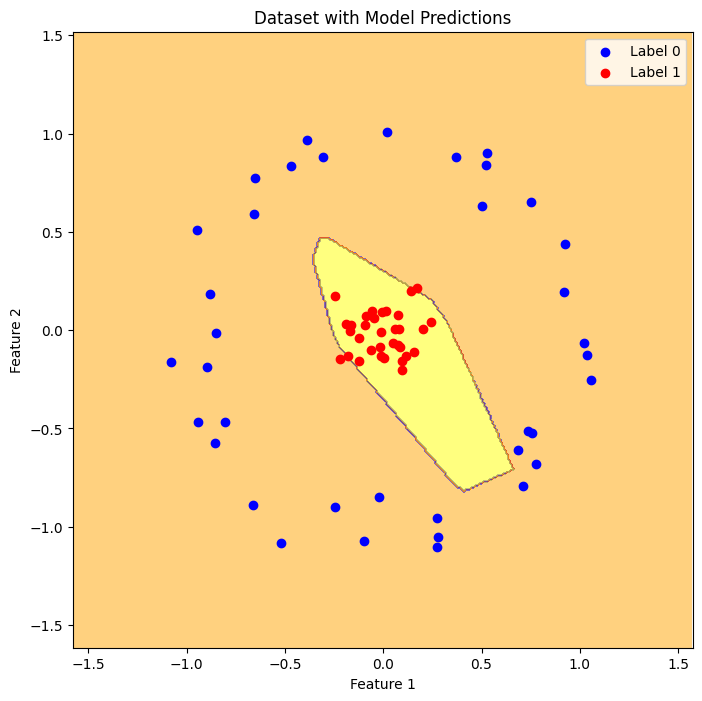

Epoch 80/1000, Loss: 0.5434000492095947
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


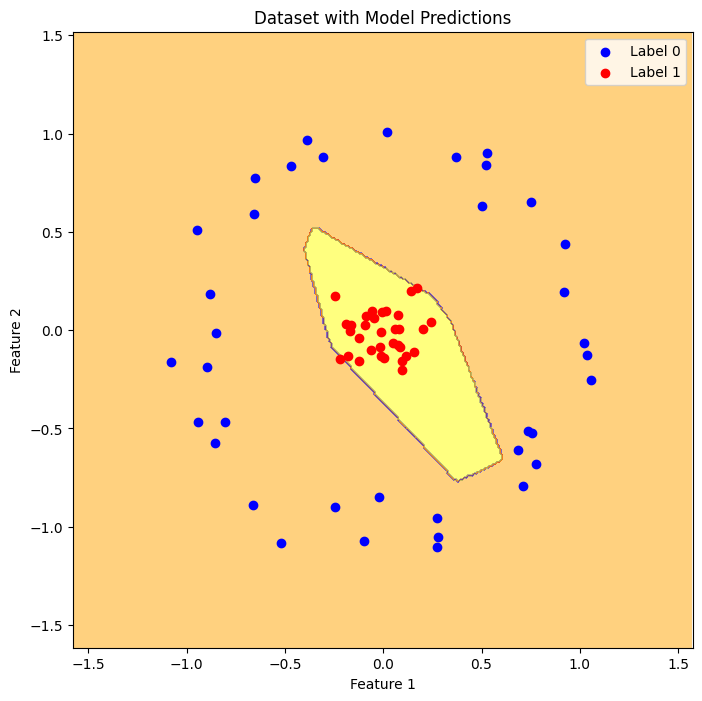

Epoch 90/1000, Loss: 0.577012836933136
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


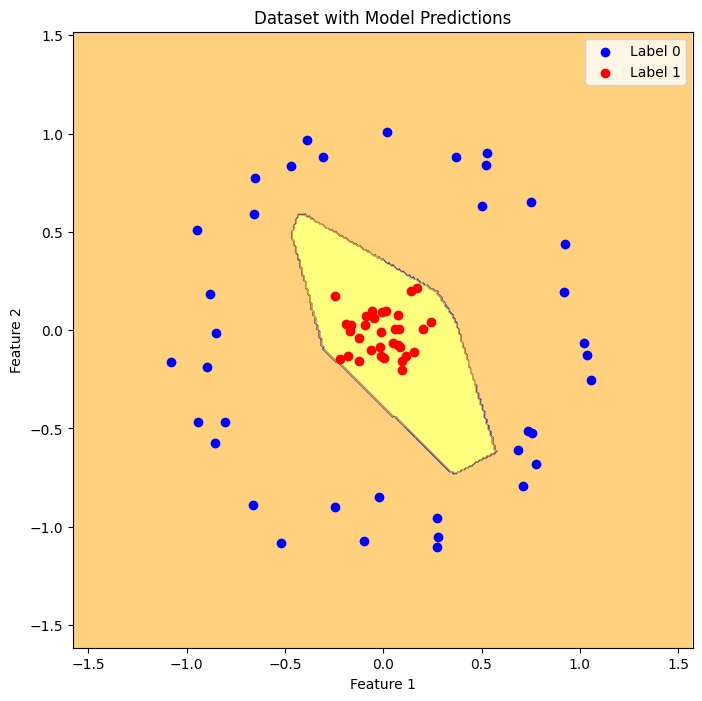

Epoch 100/1000, Loss: 0.5940297245979309
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


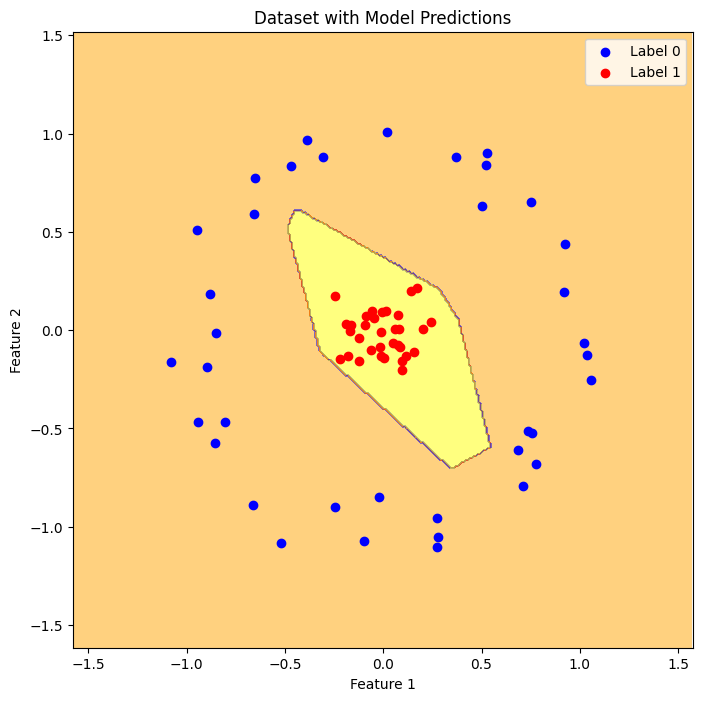

Epoch 110/1000, Loss: 0.4100814163684845
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


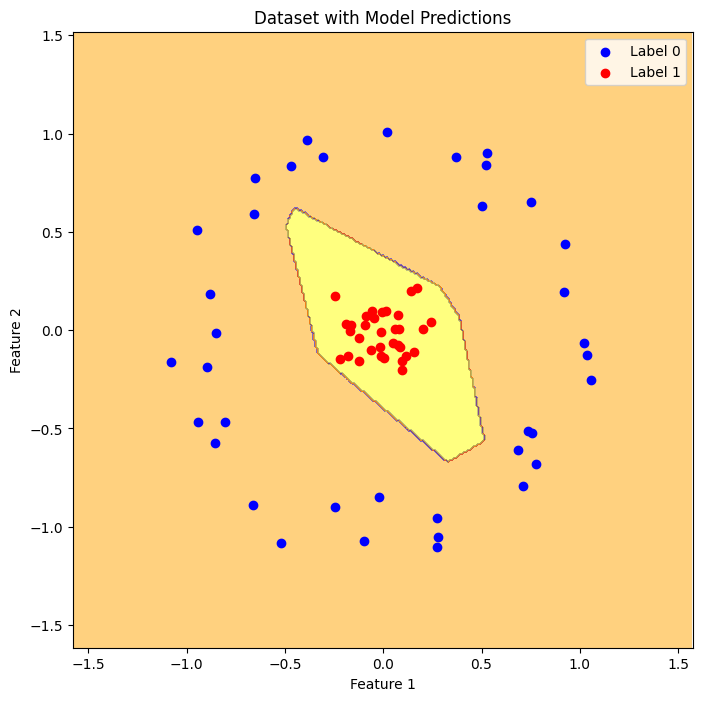

Epoch 120/1000, Loss: 0.28210264444351196
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


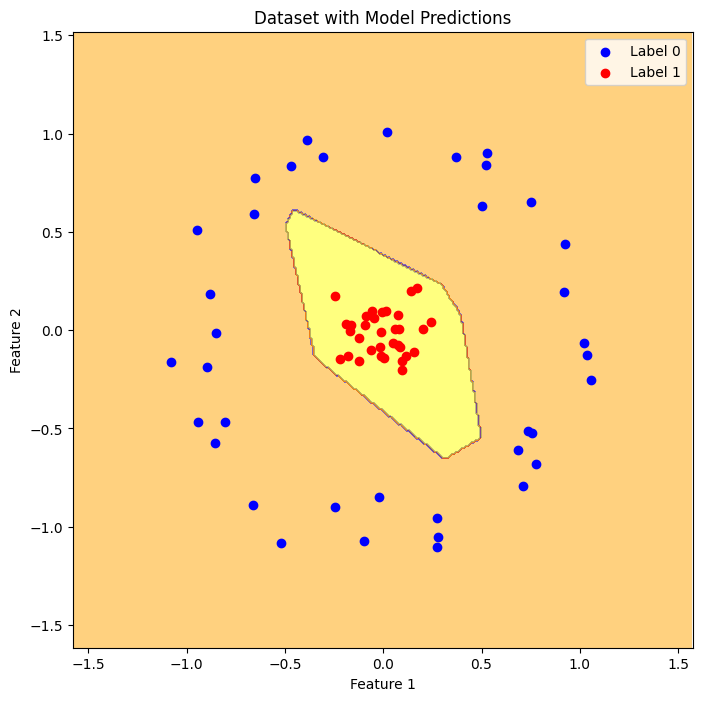

Epoch 130/1000, Loss: 0.31458762288093567
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


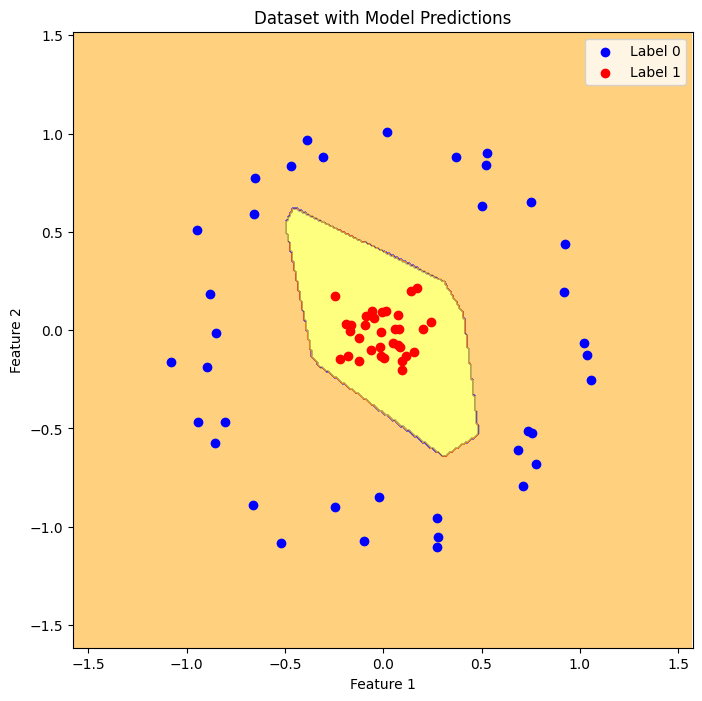

Epoch 140/1000, Loss: 0.31412824988365173
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


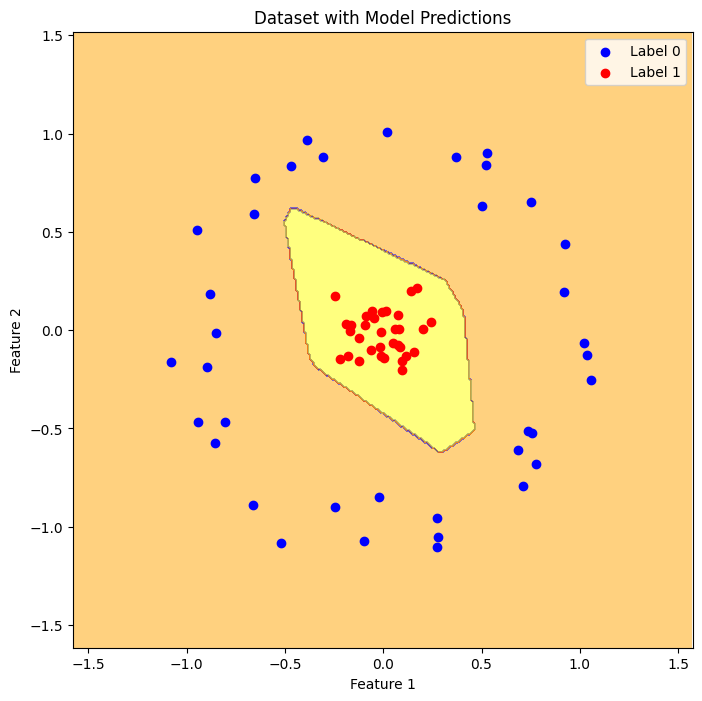

Epoch 150/1000, Loss: 0.37124350666999817
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


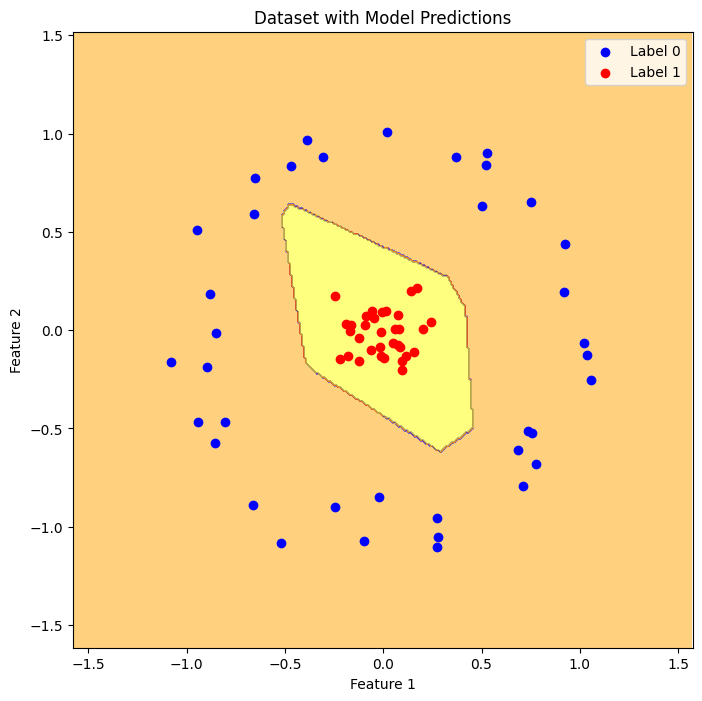

Epoch 160/1000, Loss: 0.24840791523456573
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


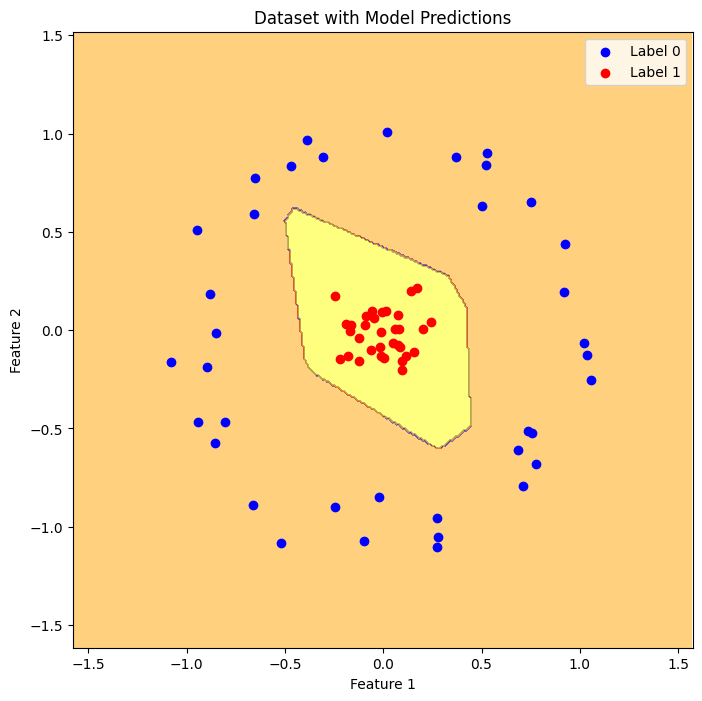

Epoch 170/1000, Loss: 0.29869192838668823
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


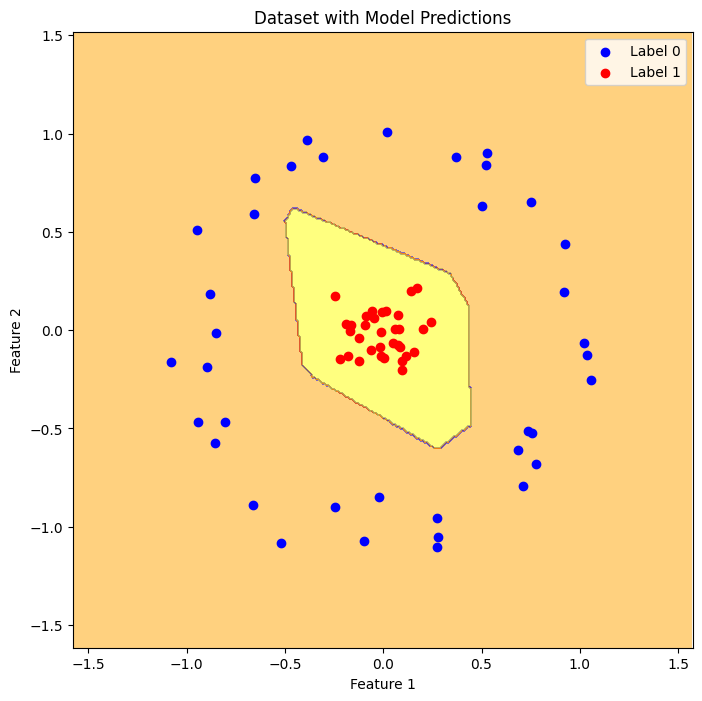

Epoch 180/1000, Loss: 0.19883675873279572
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


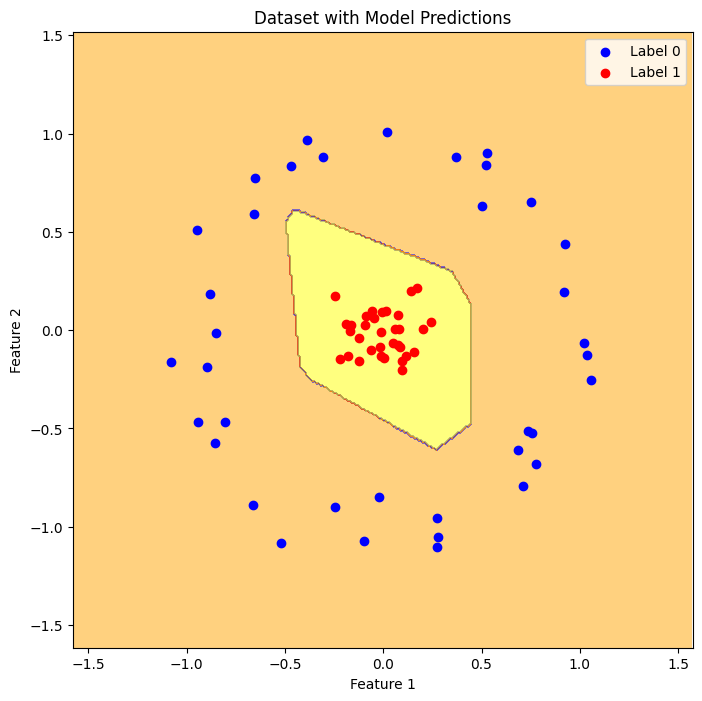

Epoch 190/1000, Loss: 0.2550663650035858
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


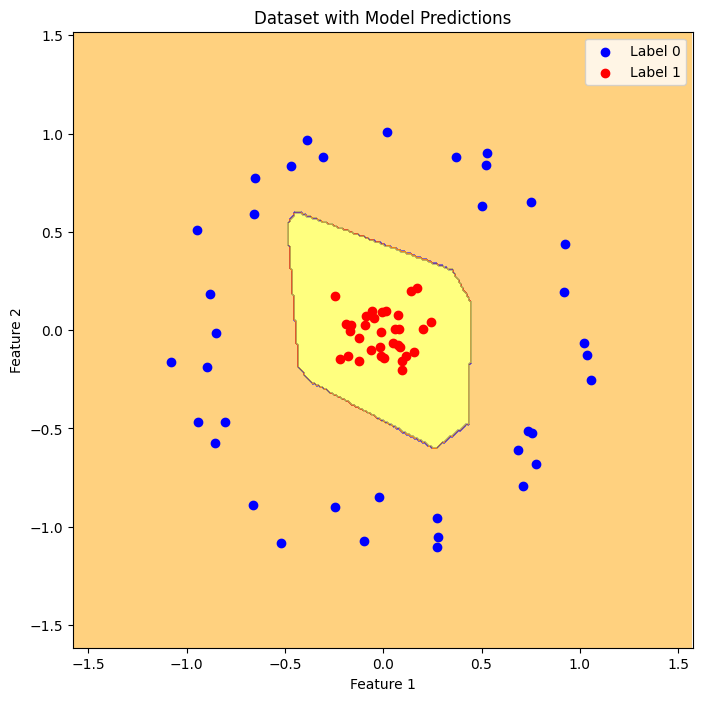

Epoch 200/1000, Loss: 0.19424675405025482
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


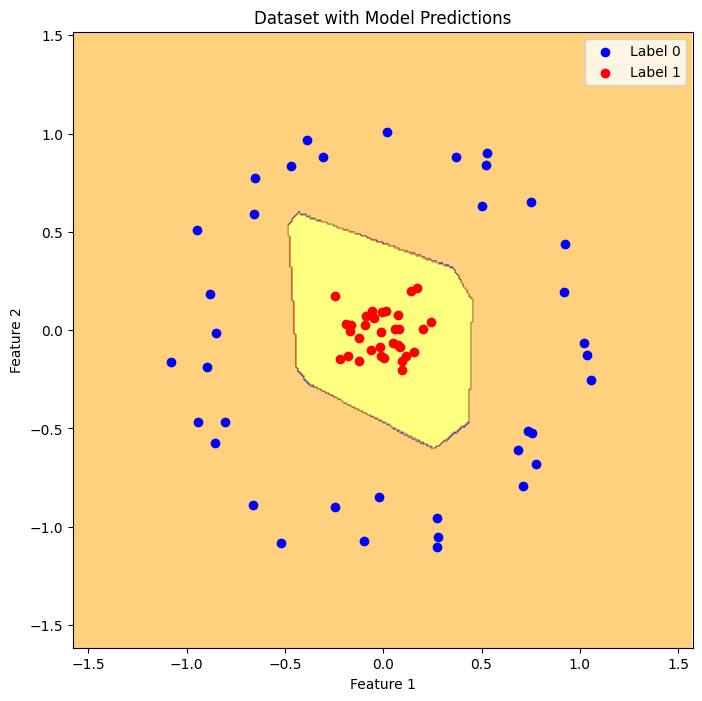

Epoch 210/1000, Loss: 0.19578659534454346
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


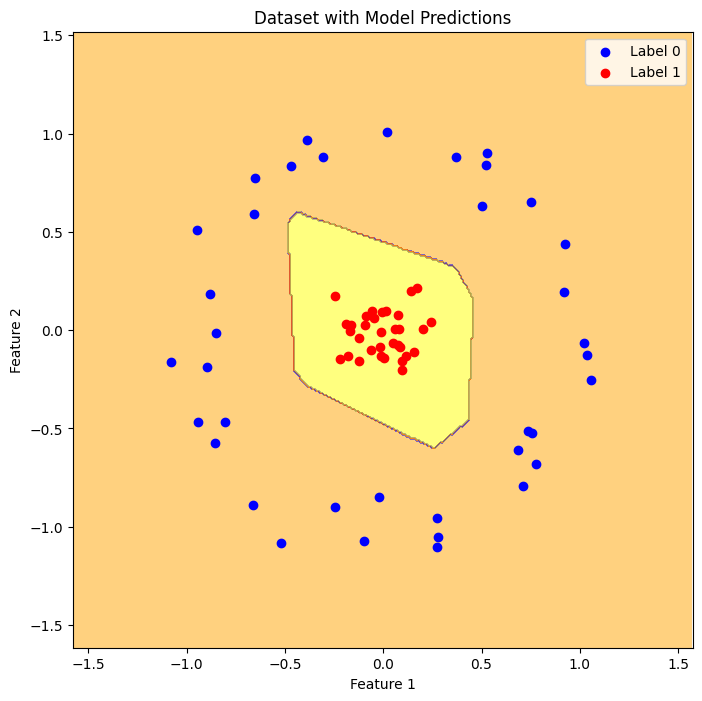

Epoch 220/1000, Loss: 0.1276237964630127
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


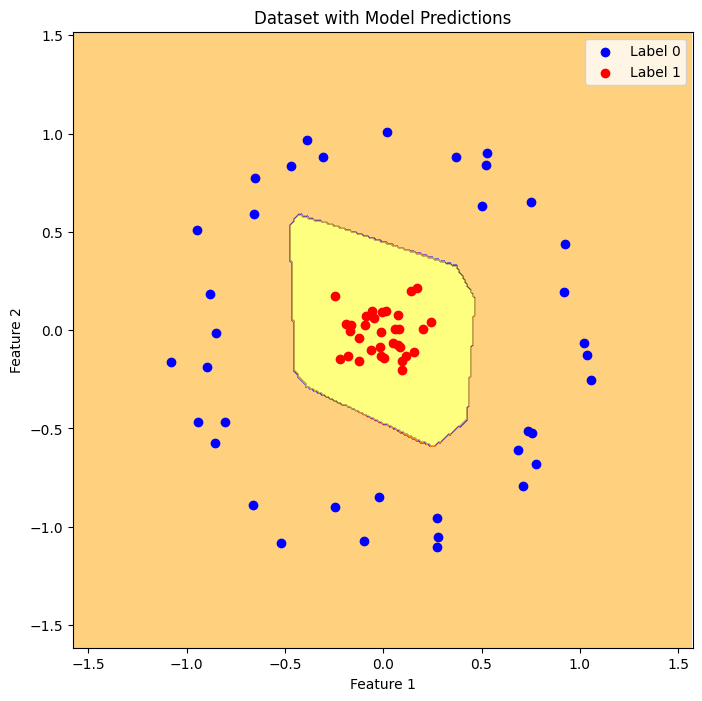

Epoch 230/1000, Loss: 0.17145080864429474
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


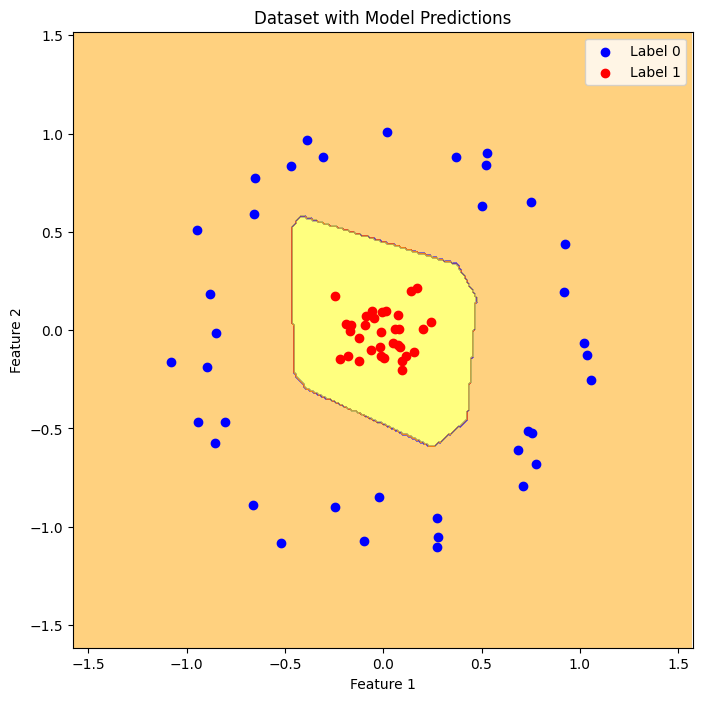

Epoch 240/1000, Loss: 0.09921785444021225
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


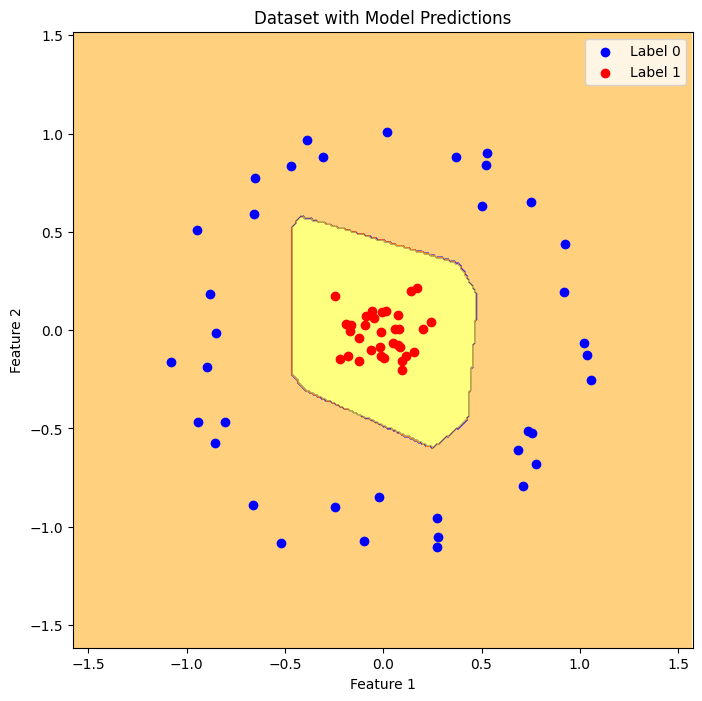

Epoch 250/1000, Loss: 0.11502817273139954
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


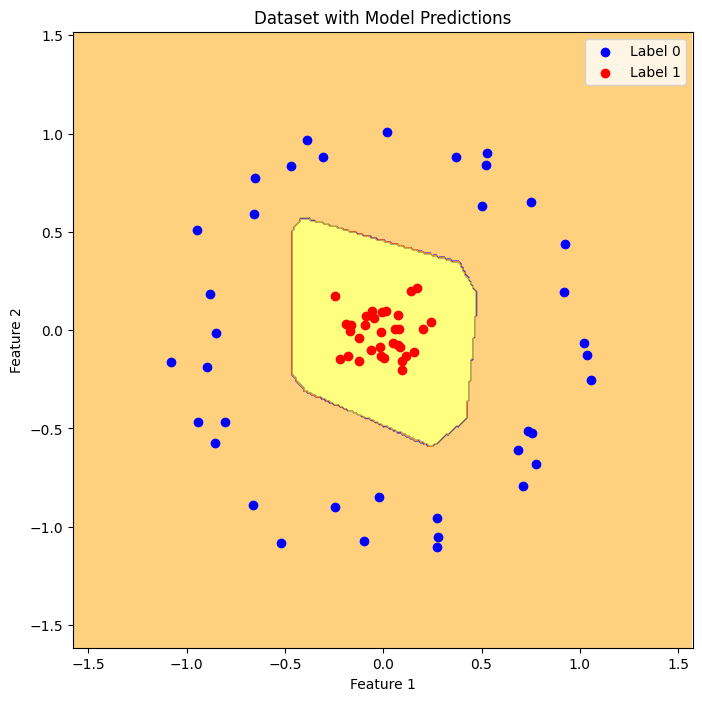

Epoch 260/1000, Loss: 0.1572314351797104
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


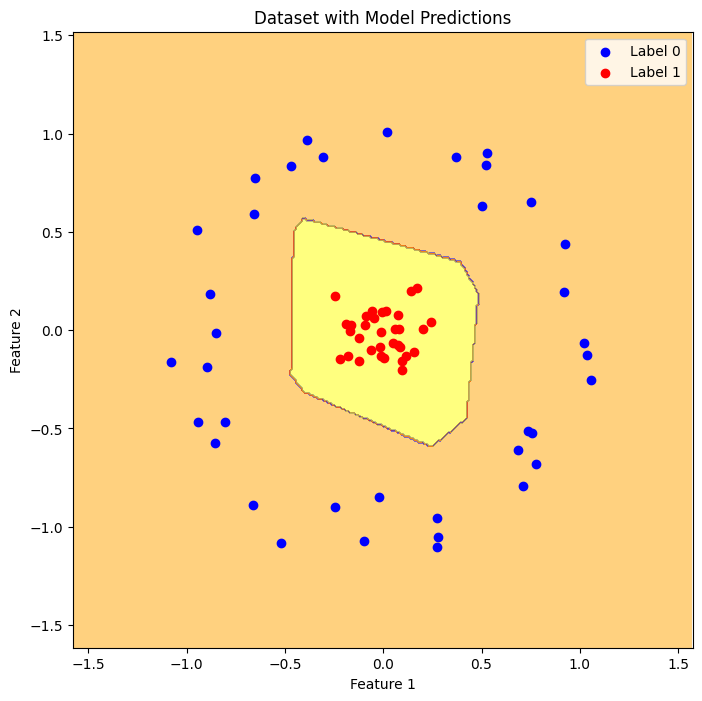

Epoch 270/1000, Loss: 0.10087650269269943
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


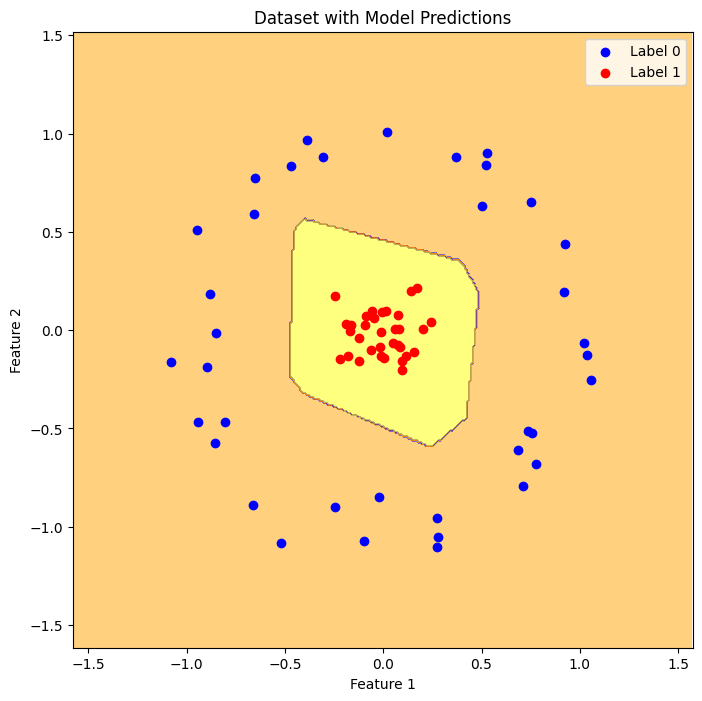

Epoch 280/1000, Loss: 0.14810281991958618
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


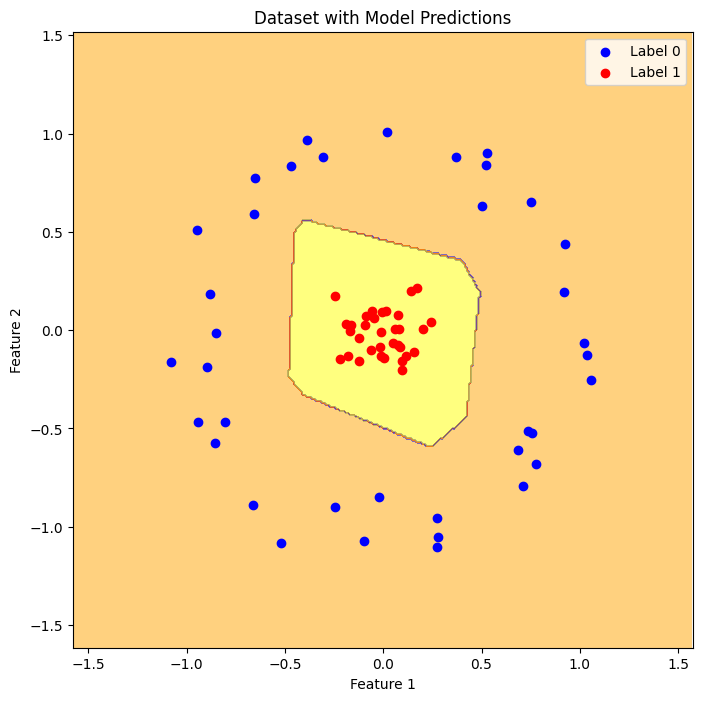

Epoch 290/1000, Loss: 0.0766332820057869
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


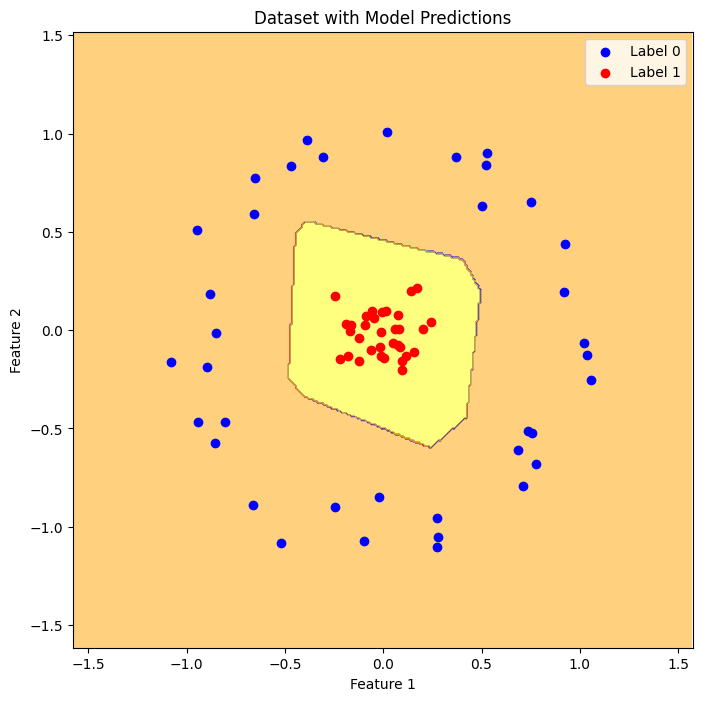

Epoch 300/1000, Loss: 0.12594014406204224
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


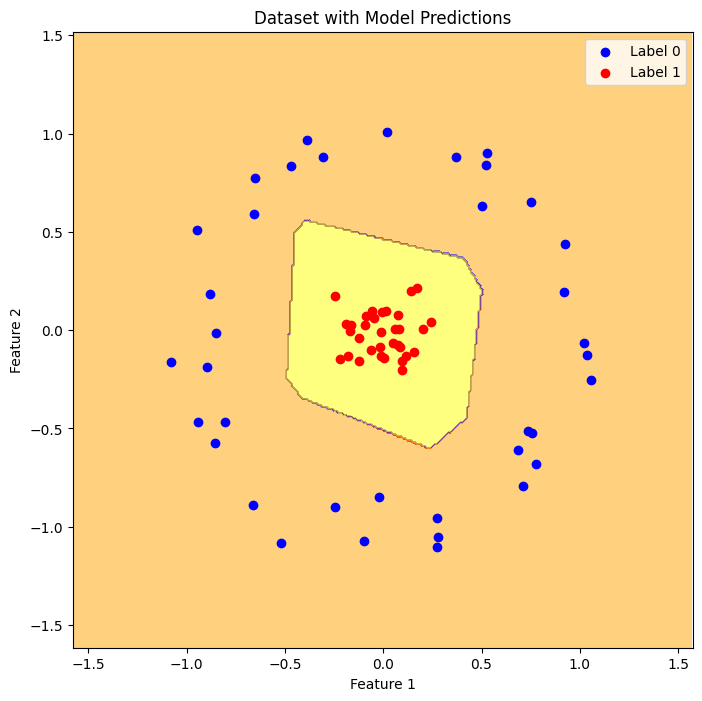

Epoch 310/1000, Loss: 0.08218354731798172
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


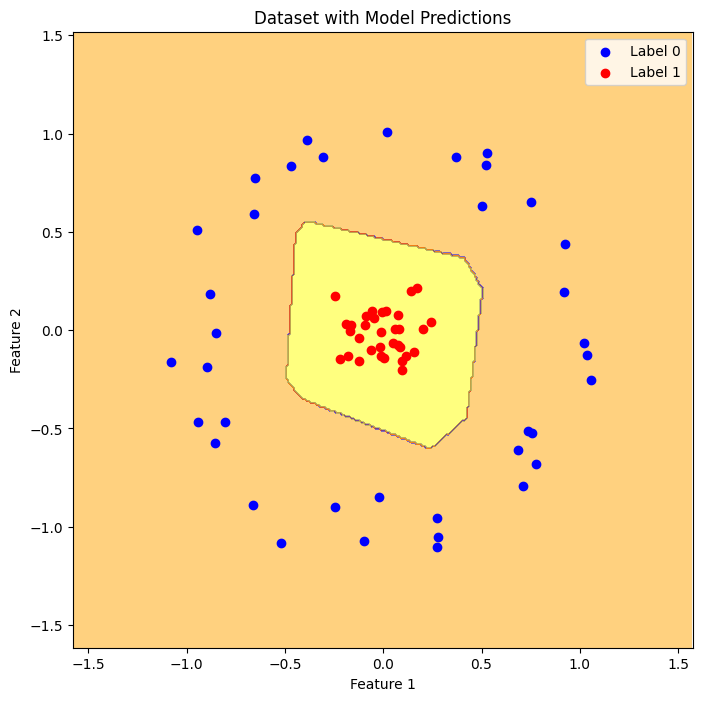

Epoch 320/1000, Loss: 0.060873910784721375
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


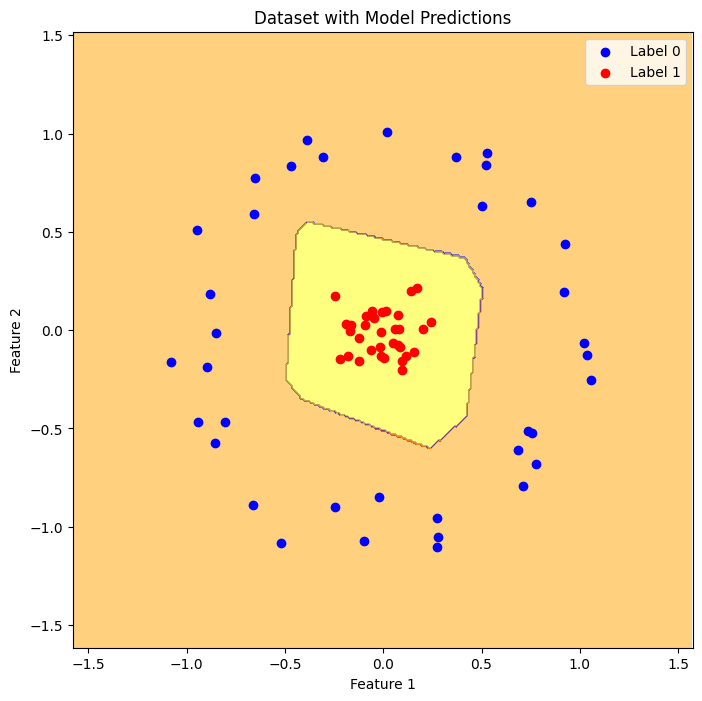

Epoch 330/1000, Loss: 0.06490889936685562
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


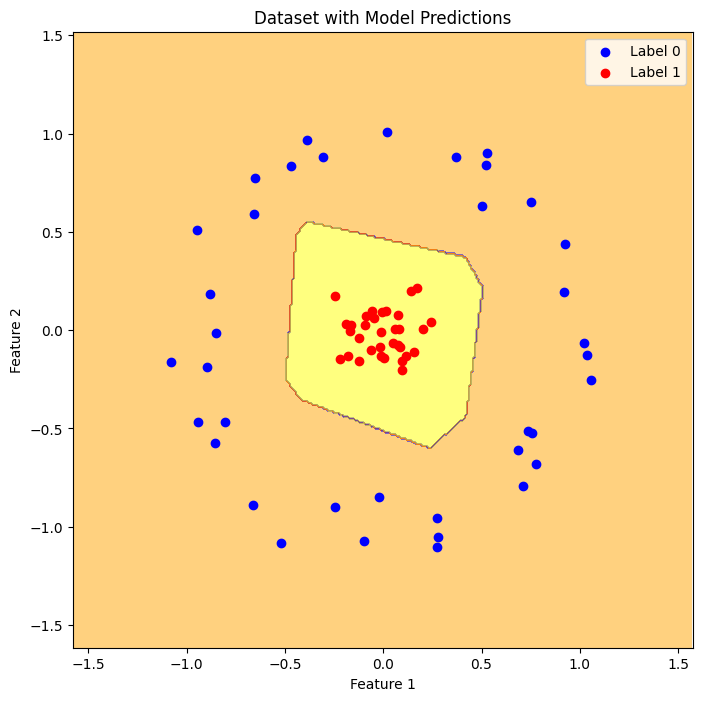

Epoch 340/1000, Loss: 0.06645411252975464
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


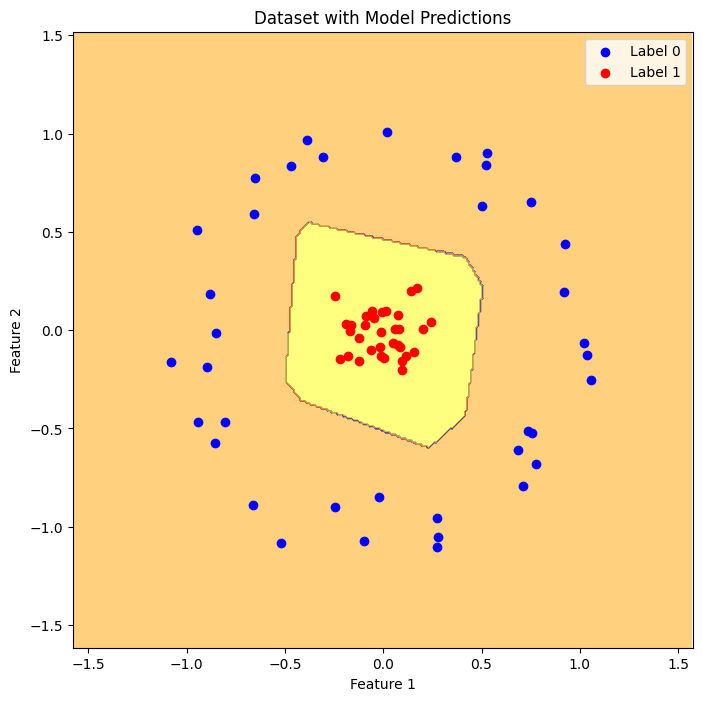

Epoch 350/1000, Loss: 0.08497866243124008
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


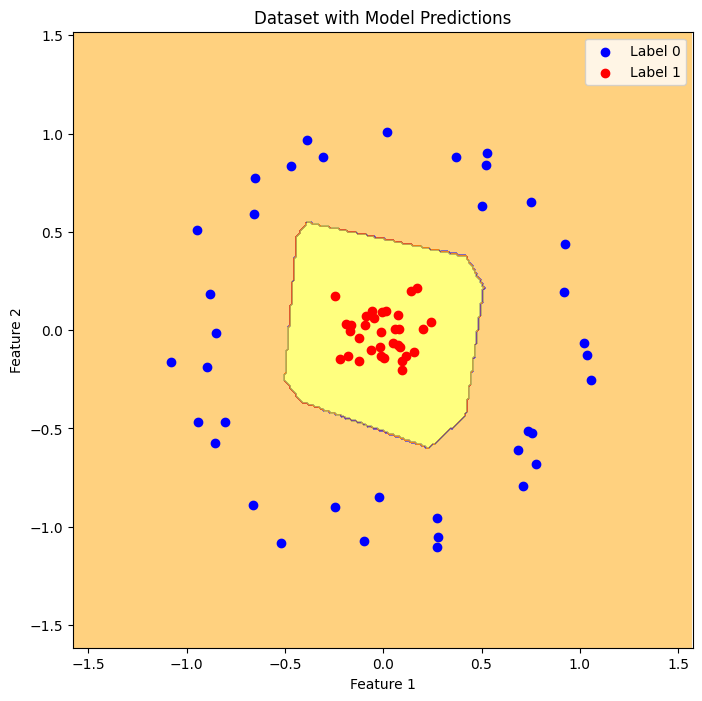

Epoch 360/1000, Loss: 0.055986206978559494
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


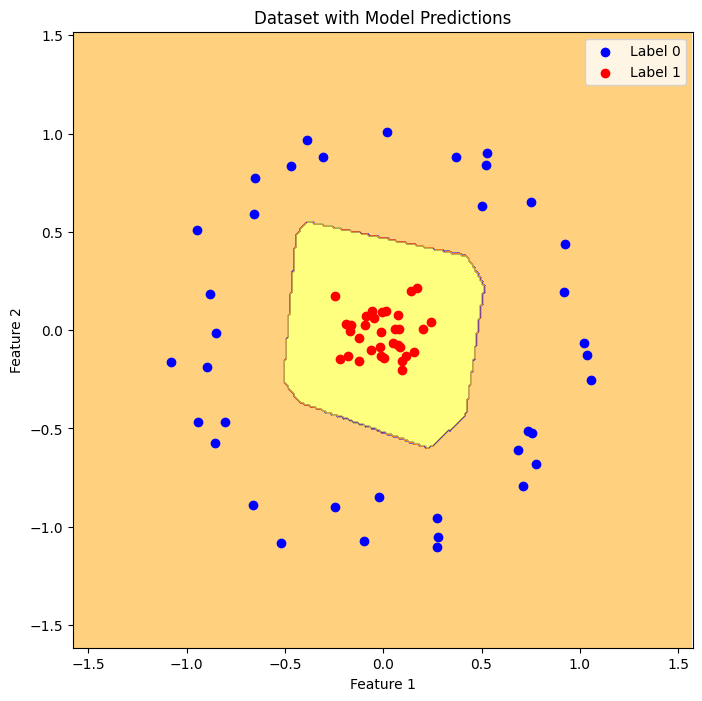

Epoch 370/1000, Loss: 0.05637882649898529
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


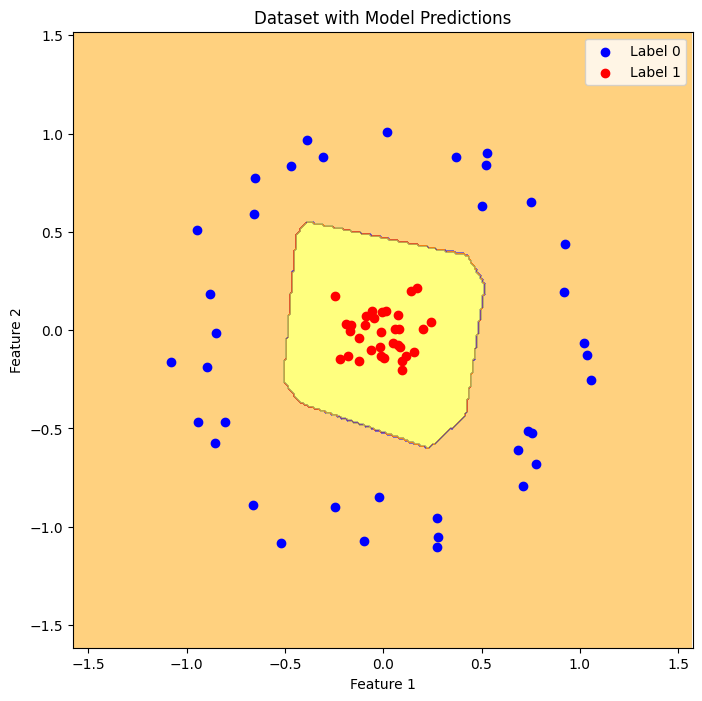

Epoch 380/1000, Loss: 0.05791414901614189
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


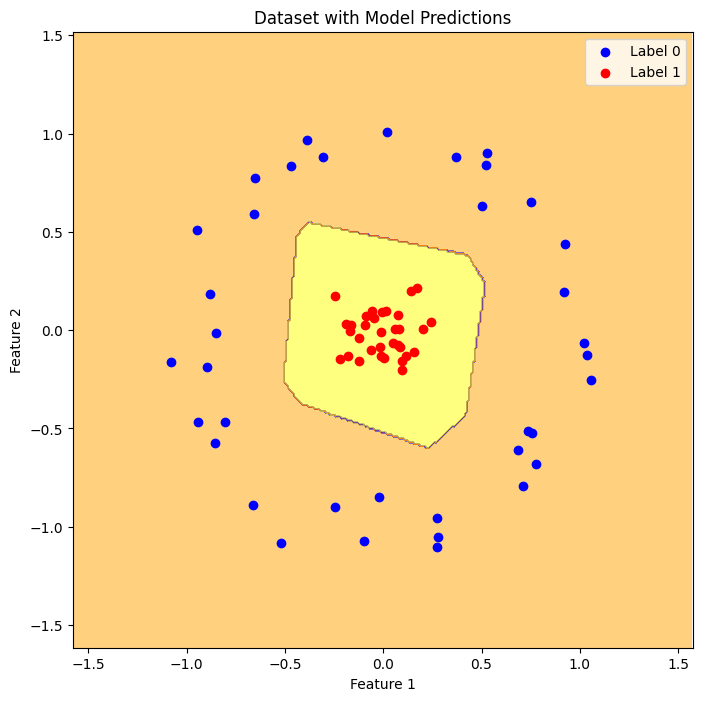

Epoch 390/1000, Loss: 0.06357773393392563
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


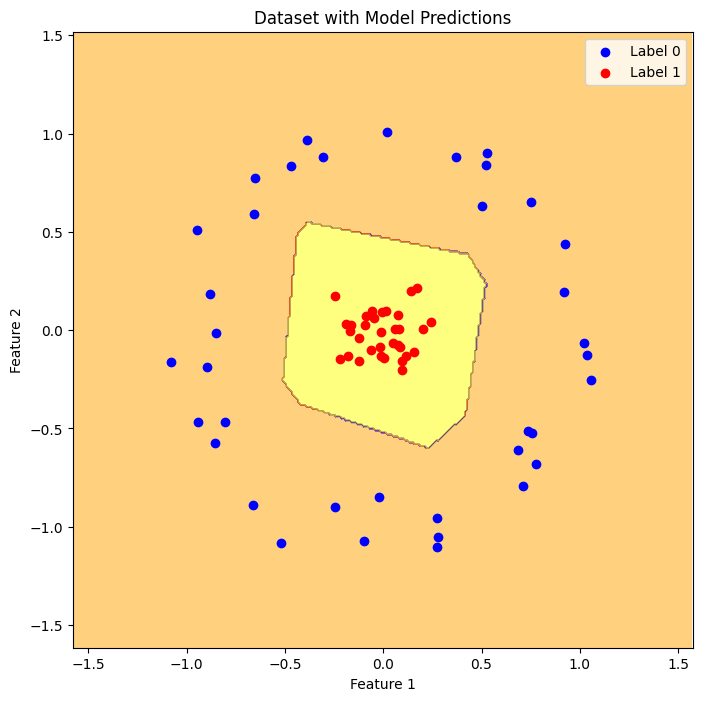

Epoch 400/1000, Loss: 0.06206383928656578
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


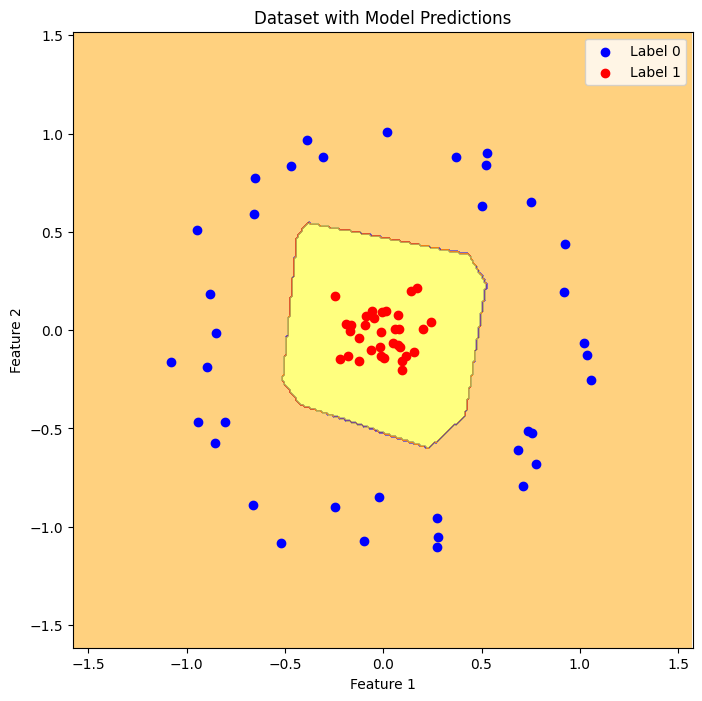

Epoch 410/1000, Loss: 0.04066438600420952
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


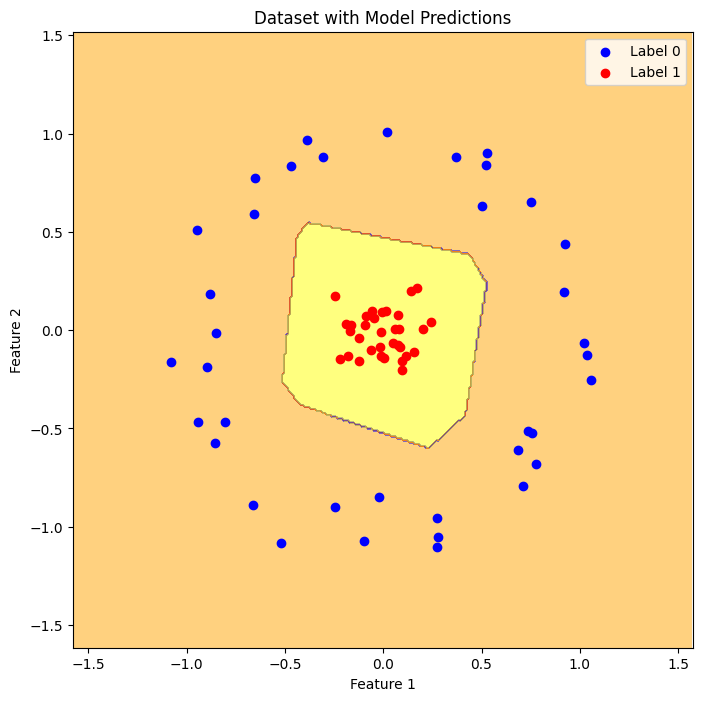

Epoch 420/1000, Loss: 0.06950055062770844
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


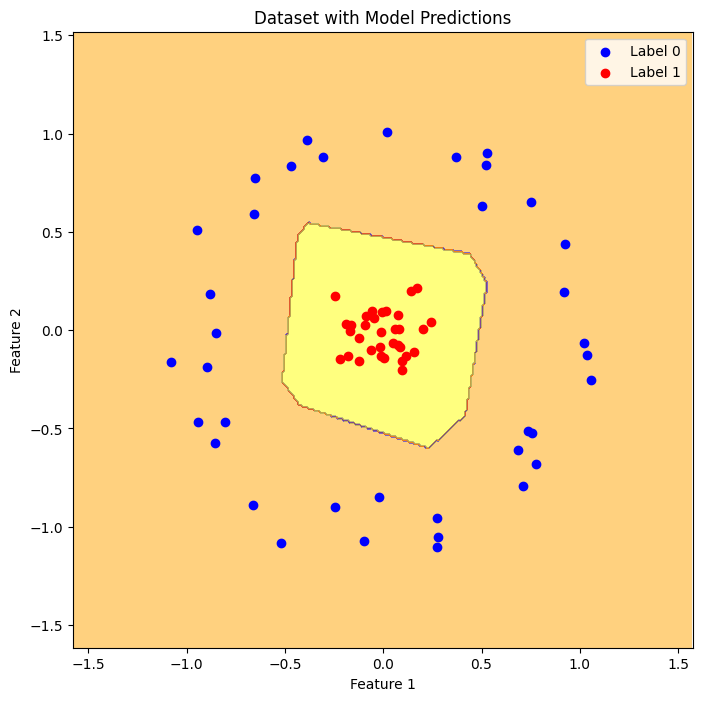

Epoch 430/1000, Loss: 0.033222880214452744
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


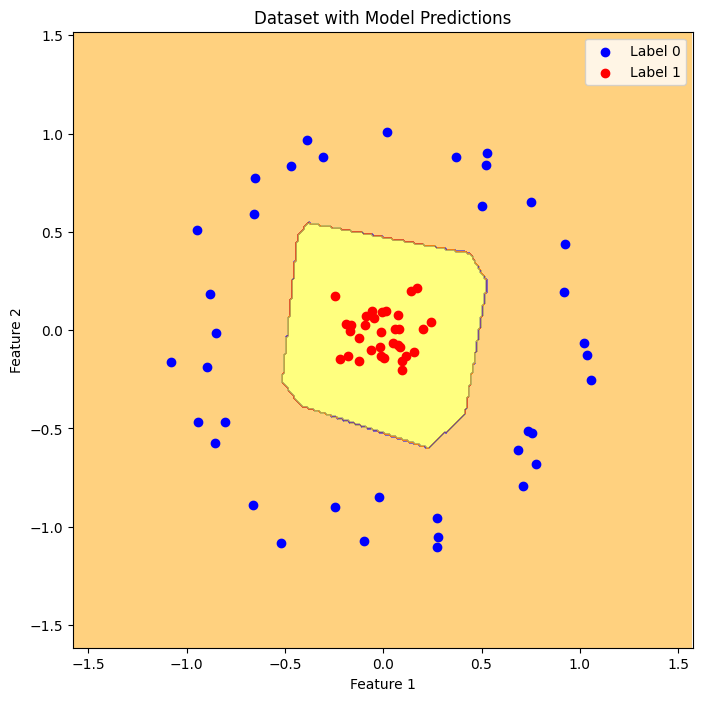

Epoch 440/1000, Loss: 0.03390266373753548
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


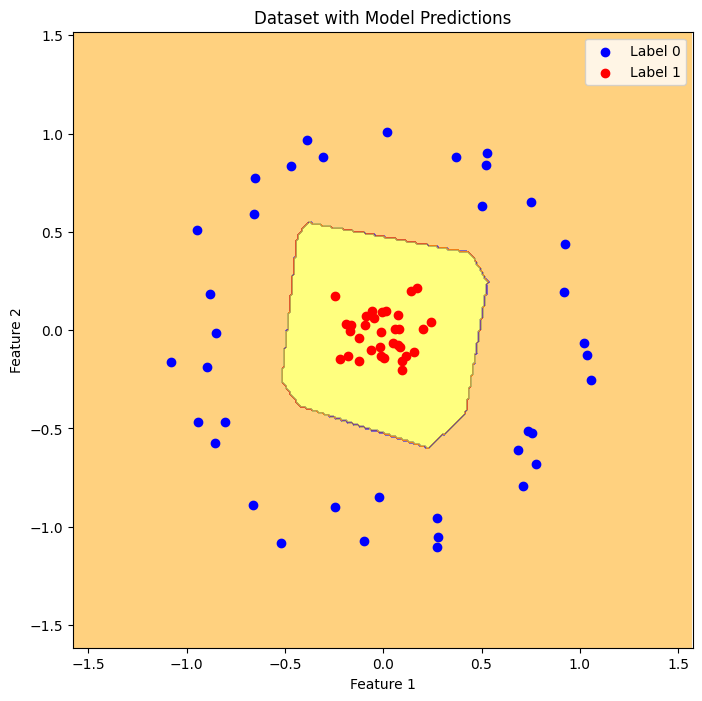

Epoch 450/1000, Loss: 0.026361173018813133
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


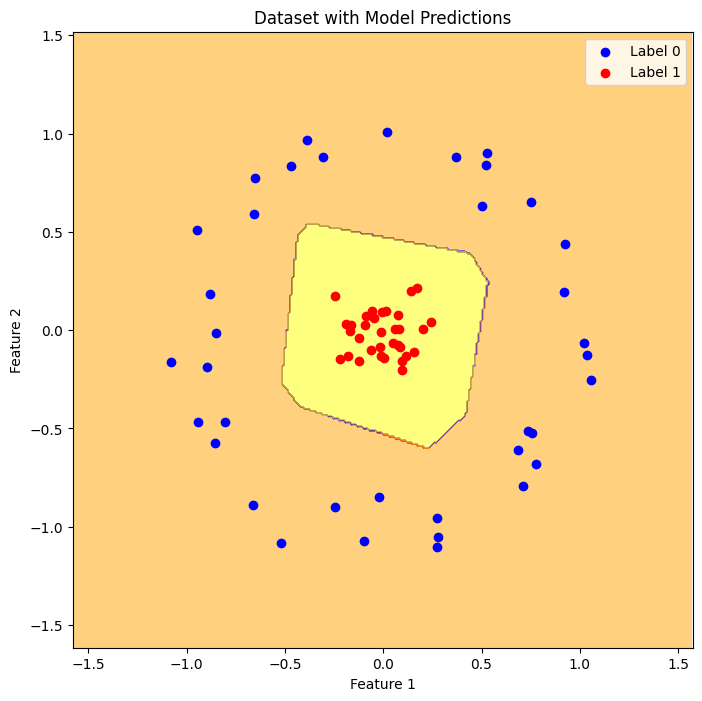

Epoch 460/1000, Loss: 0.032727815210819244
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


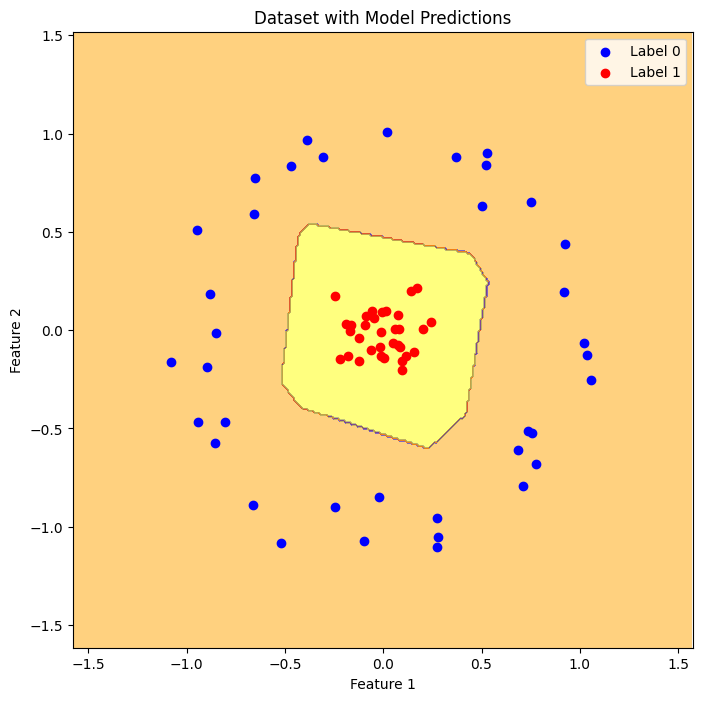

Epoch 470/1000, Loss: 0.0366799421608448
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


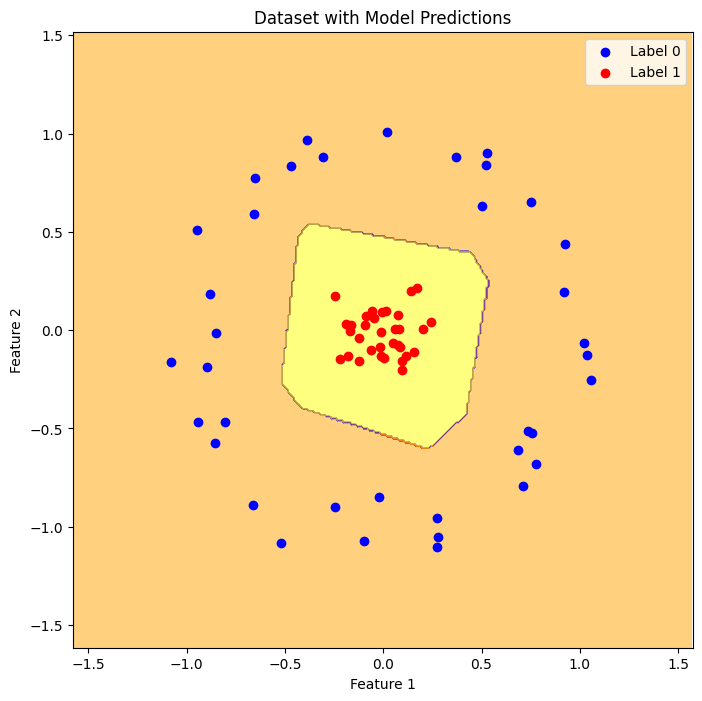

Epoch 480/1000, Loss: 0.03718340024352074
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


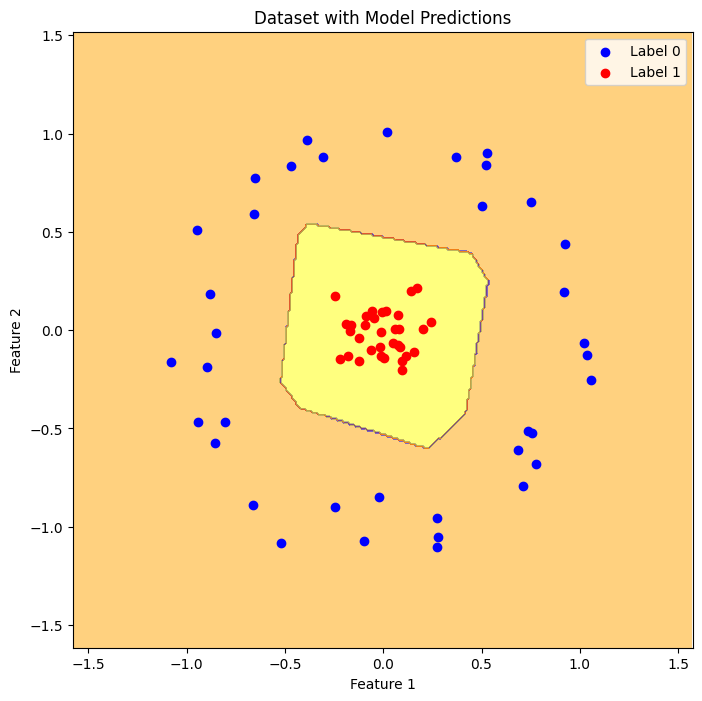

Epoch 490/1000, Loss: 0.016843782737851143
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


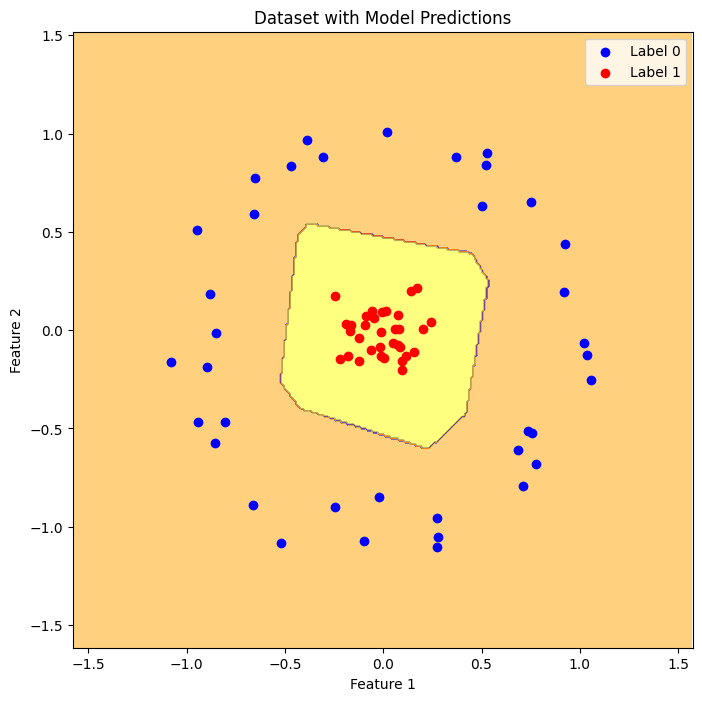

Epoch 500/1000, Loss: 0.020474117249250412
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


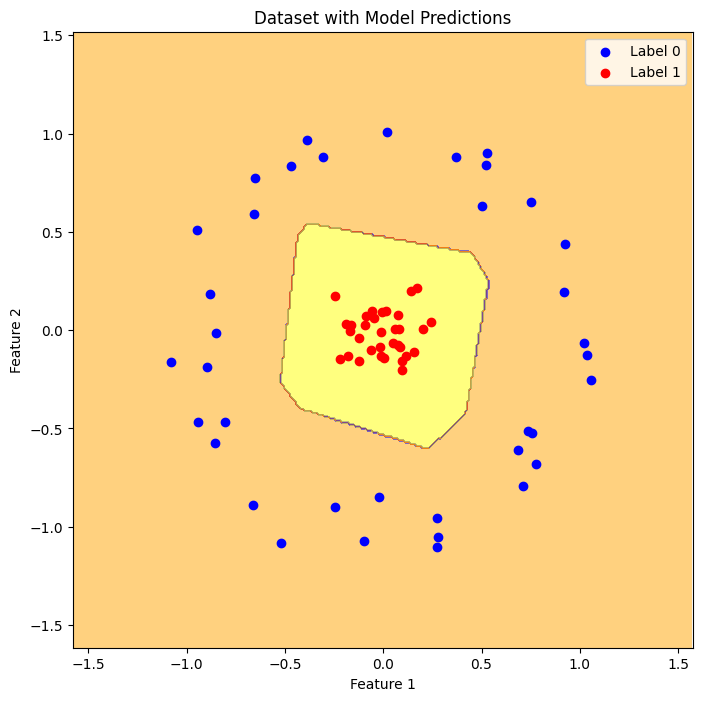

Epoch 510/1000, Loss: 0.018777744844555855
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


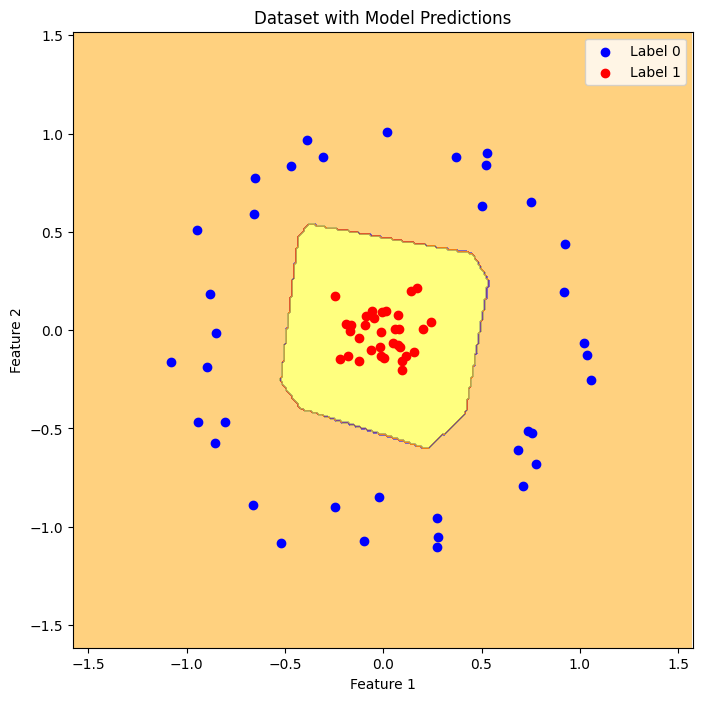

Epoch 520/1000, Loss: 0.030888408422470093
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


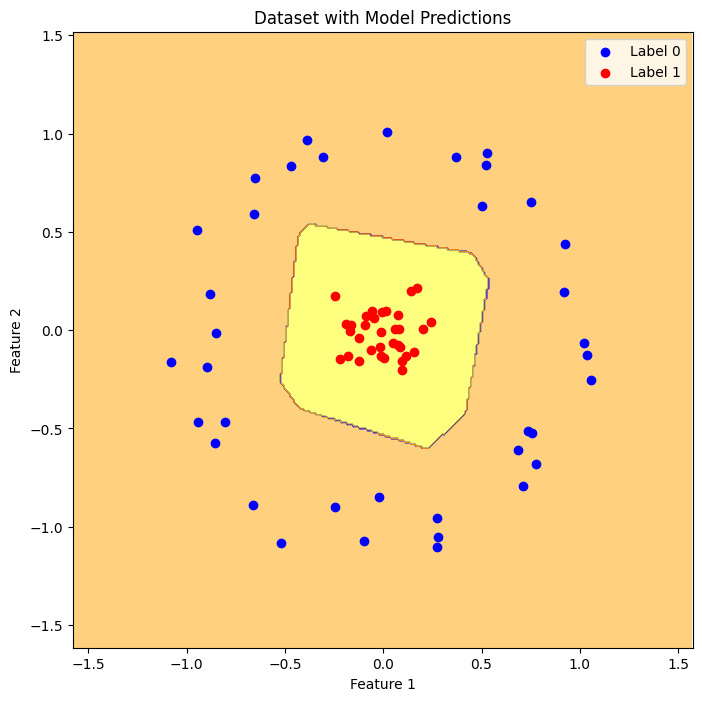

Epoch 530/1000, Loss: 0.019471218809485435
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


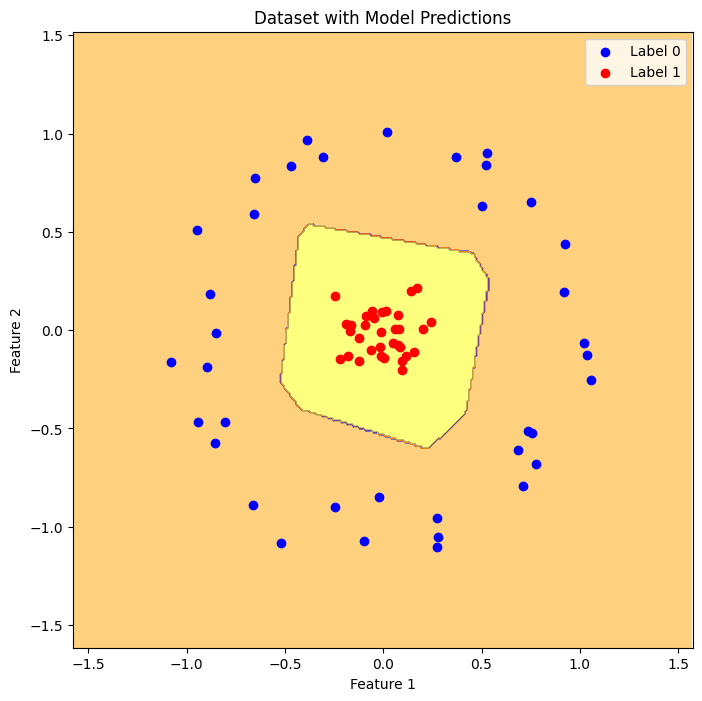

Epoch 540/1000, Loss: 0.020849684253335
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


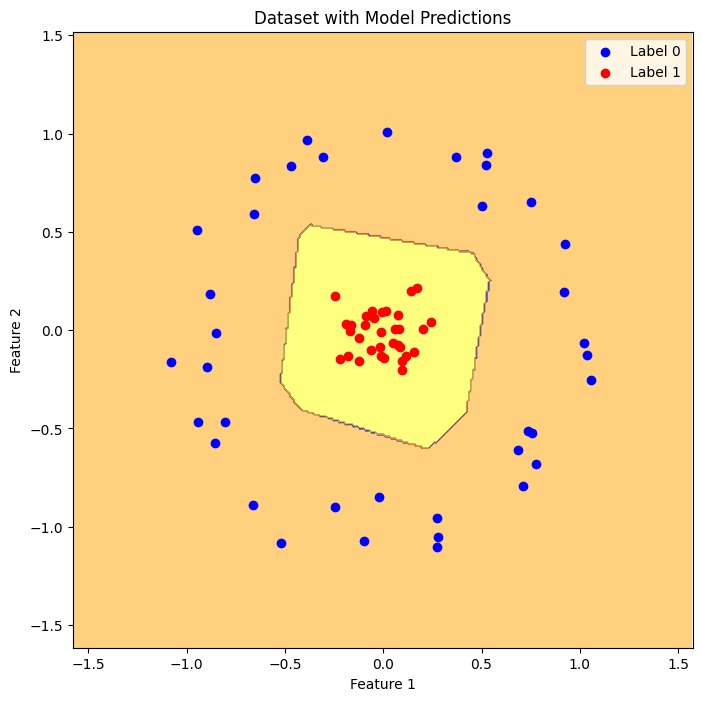

Epoch 550/1000, Loss: 0.020659230649471283
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


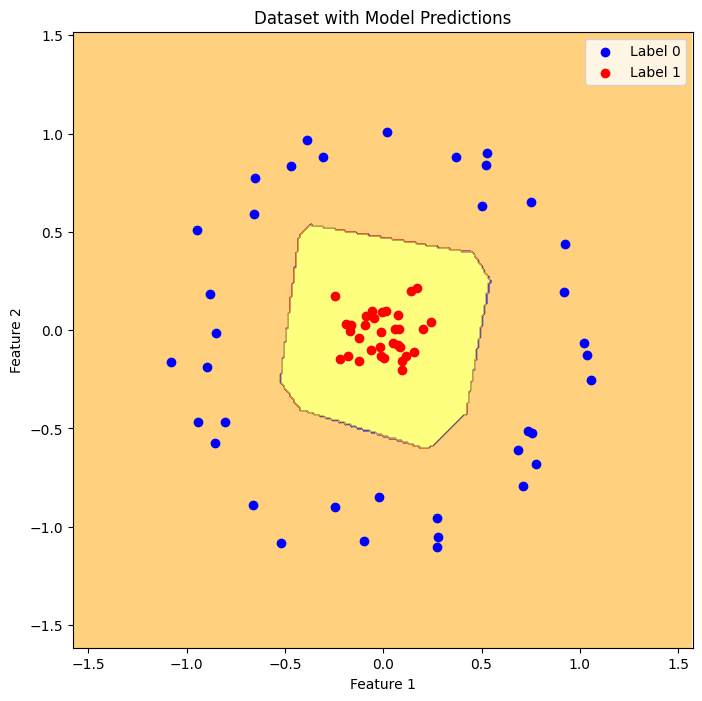

Epoch 560/1000, Loss: 0.009905879385769367
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


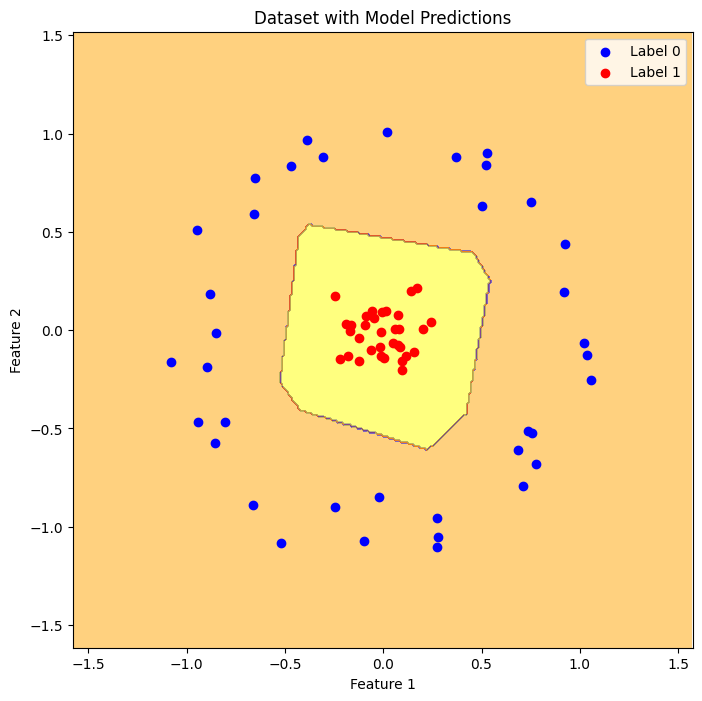

Epoch 570/1000, Loss: 0.009124773554503918
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


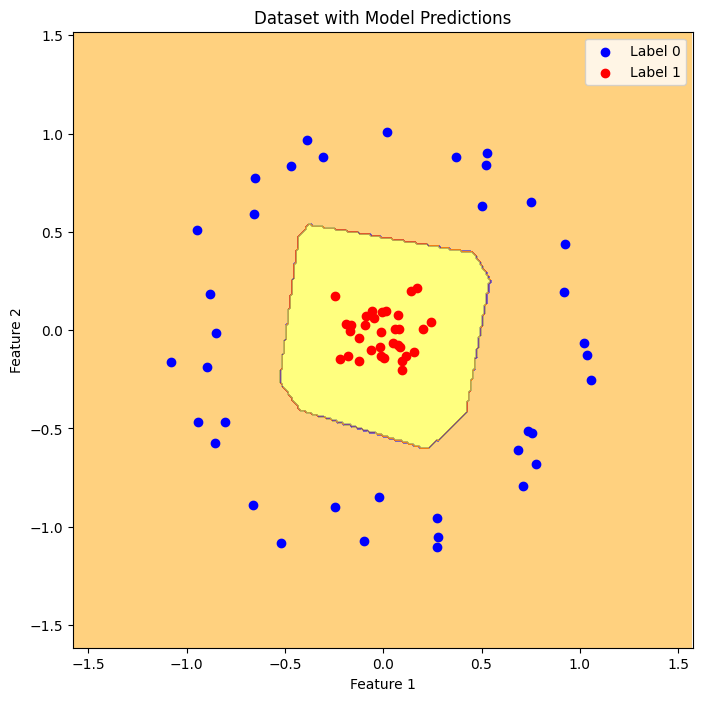

Epoch 580/1000, Loss: 0.010899055749177933
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


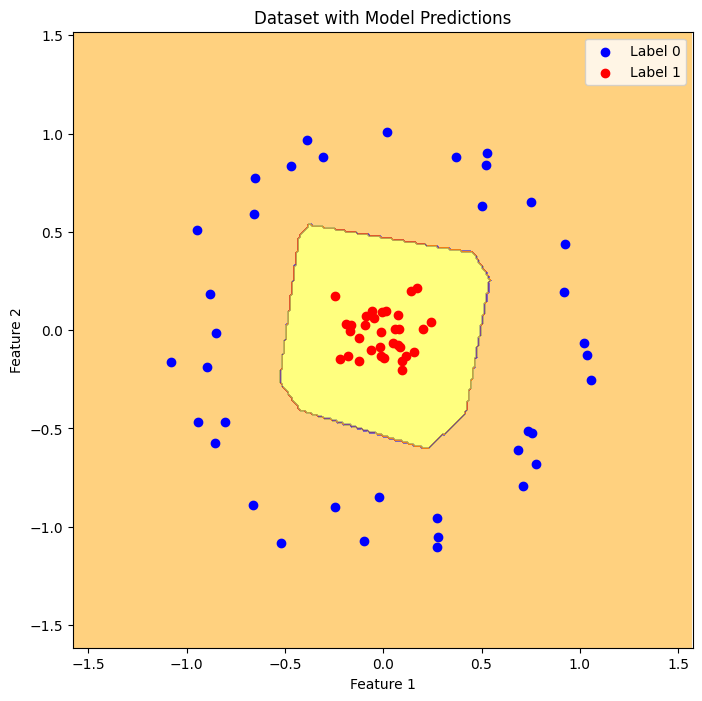

Epoch 590/1000, Loss: 0.010974404402077198
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


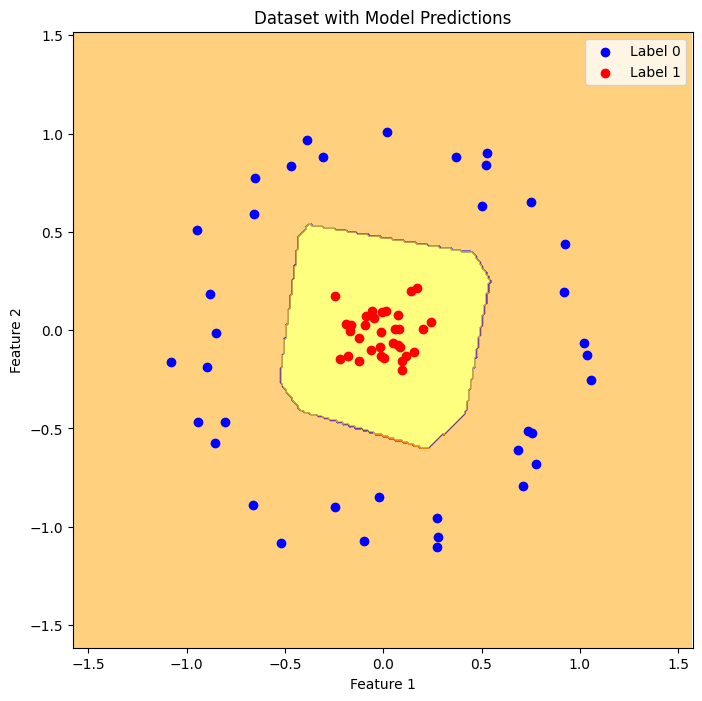

Epoch 600/1000, Loss: 0.022823626175522804
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


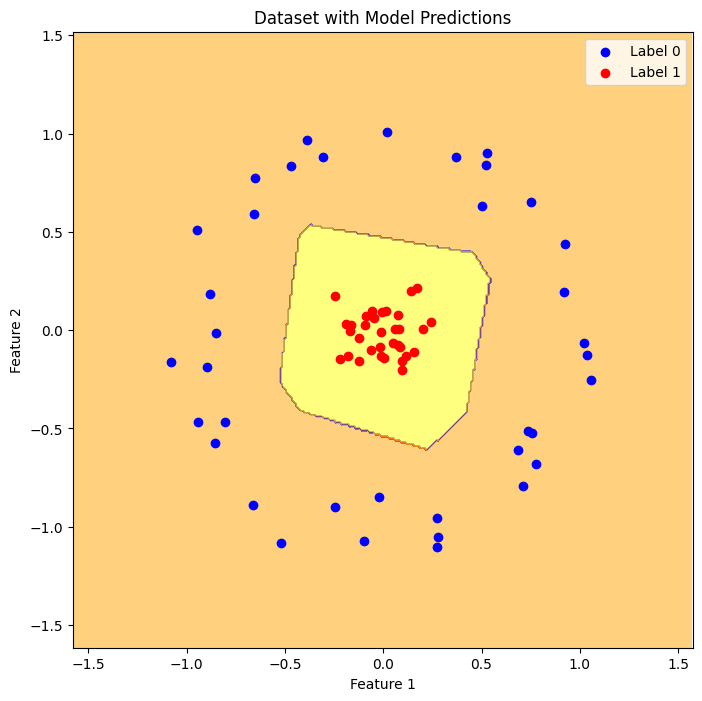

Epoch 610/1000, Loss: 0.019208142533898354
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


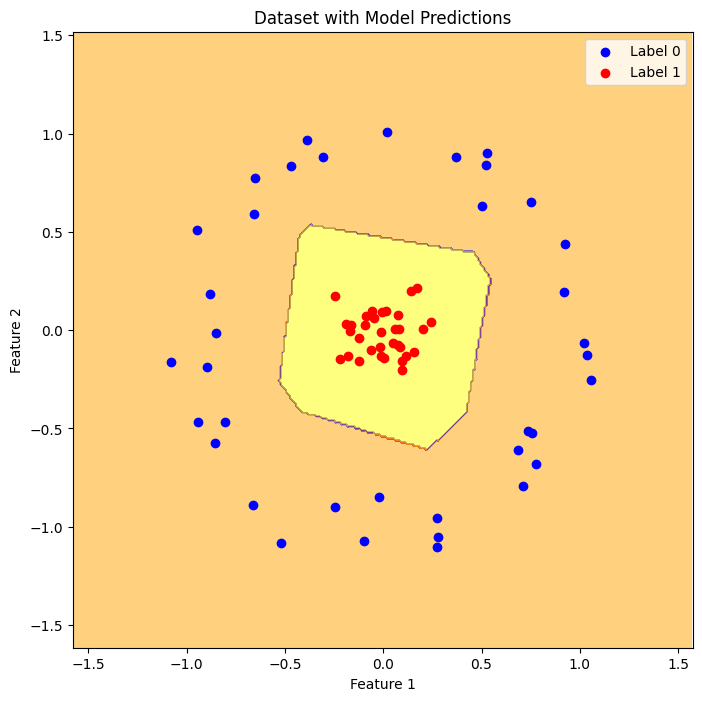

Epoch 620/1000, Loss: 0.015890631824731827
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


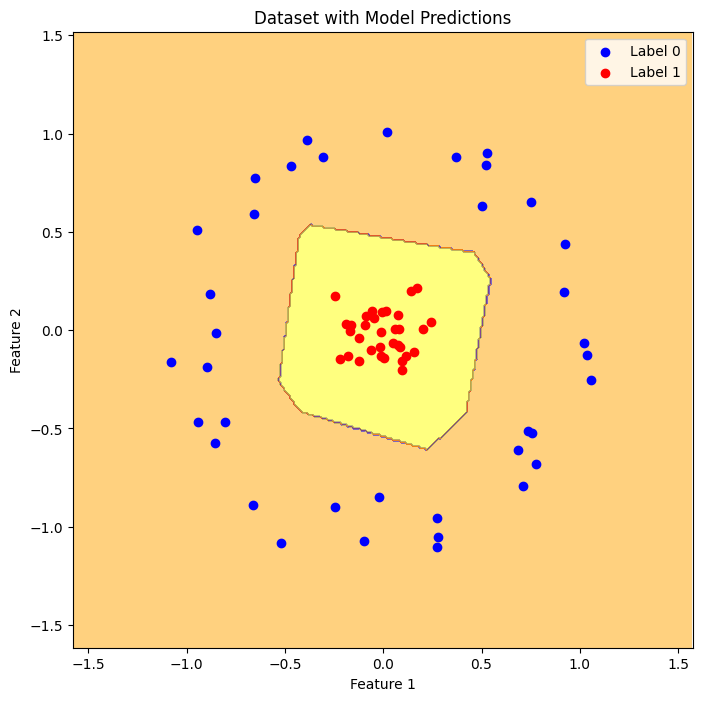

Epoch 630/1000, Loss: 0.007411985192447901
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


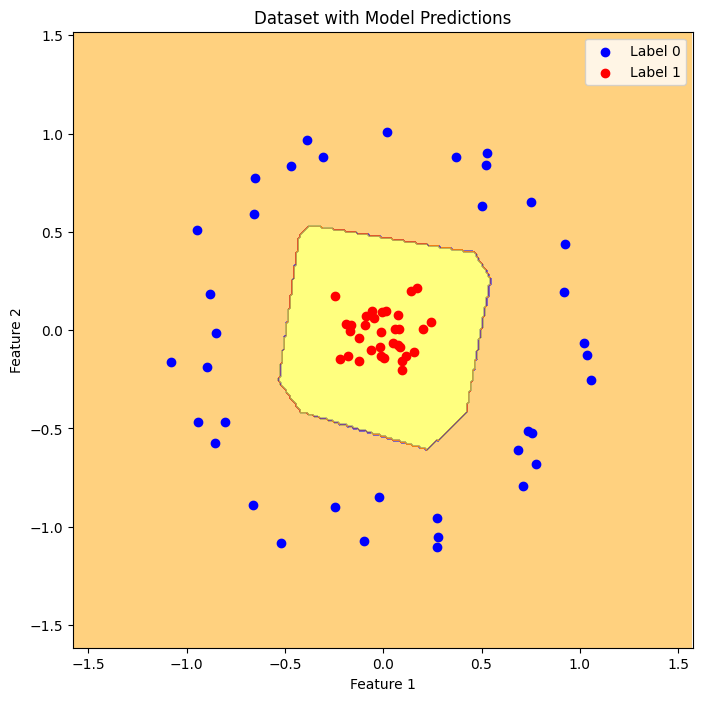

Epoch 640/1000, Loss: 0.021469376981258392
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


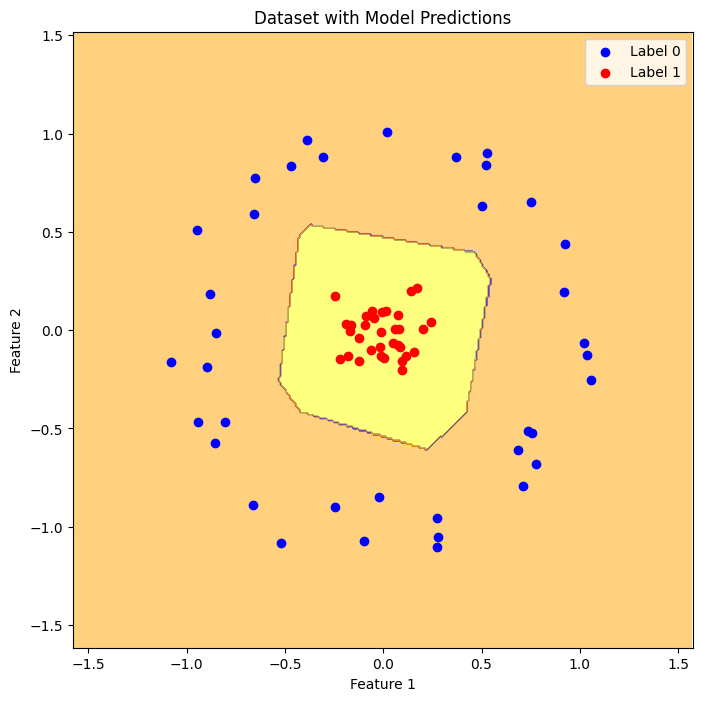

Epoch 650/1000, Loss: 0.020292701199650764
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


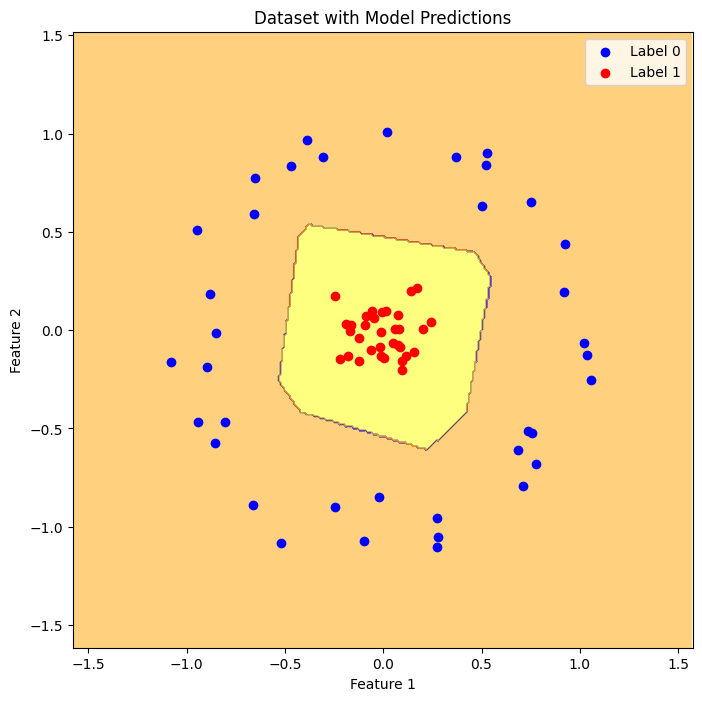

Epoch 660/1000, Loss: 0.008030977100133896
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


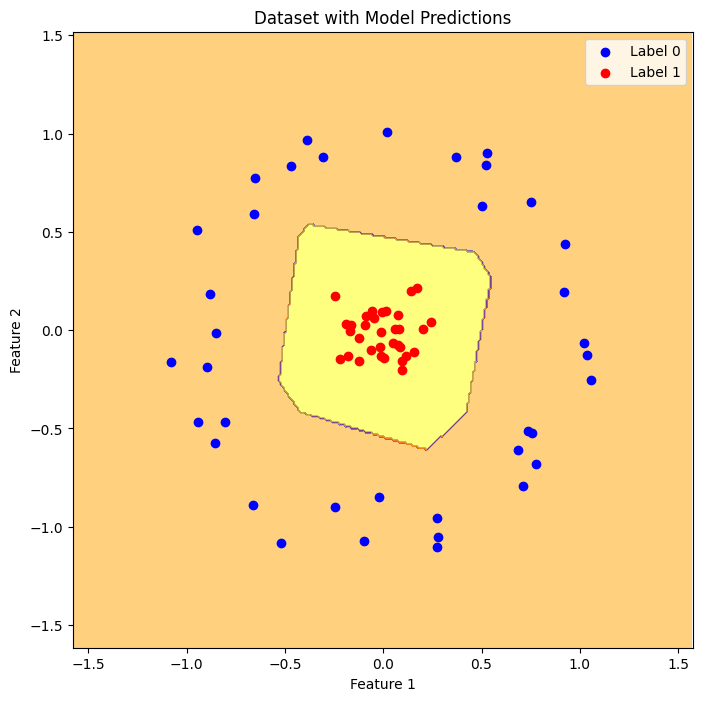

Epoch 670/1000, Loss: 0.016038430854678154
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


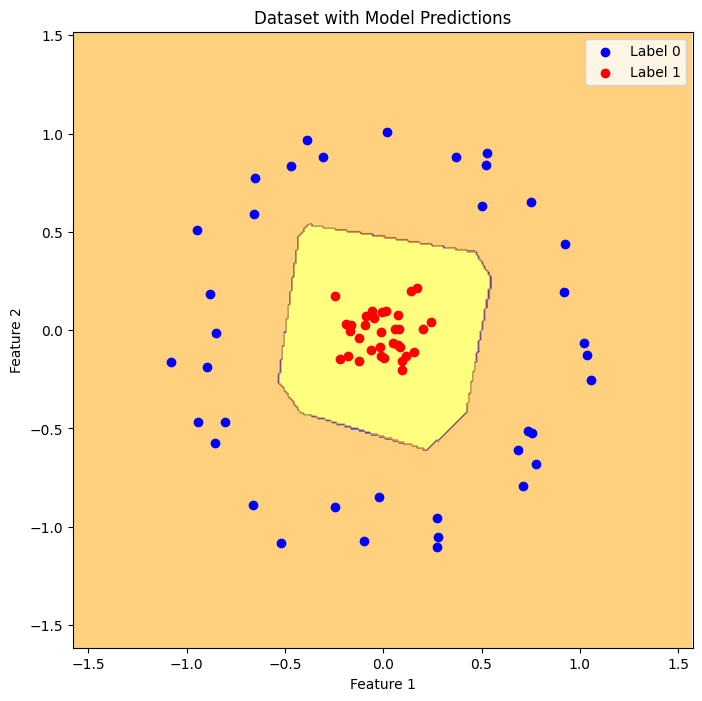

Epoch 680/1000, Loss: 0.007519627455621958
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


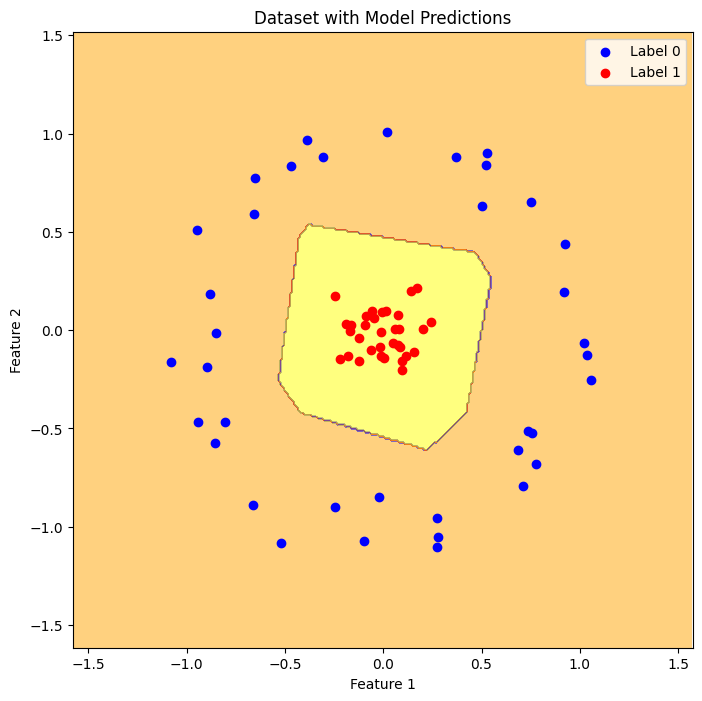

Epoch 690/1000, Loss: 0.007361181546002626
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


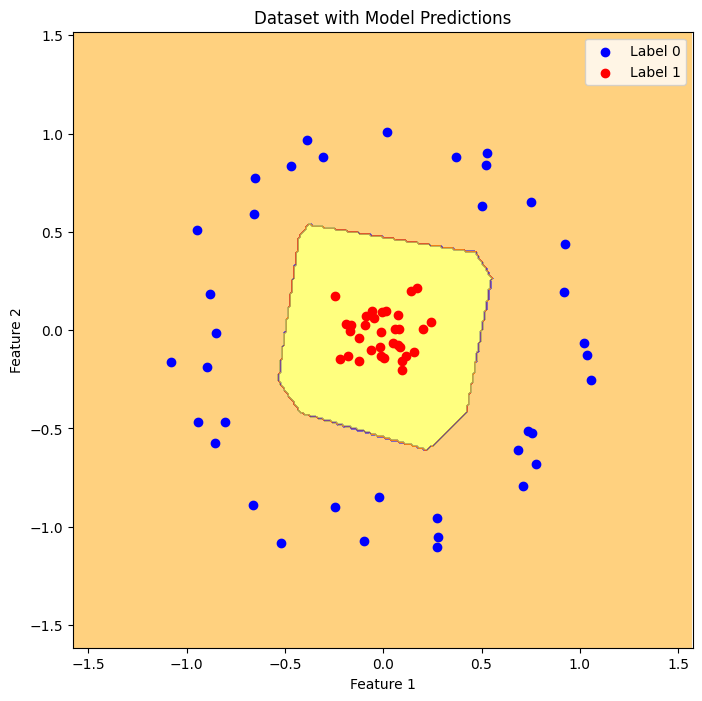

Epoch 700/1000, Loss: 0.013922746293246746
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


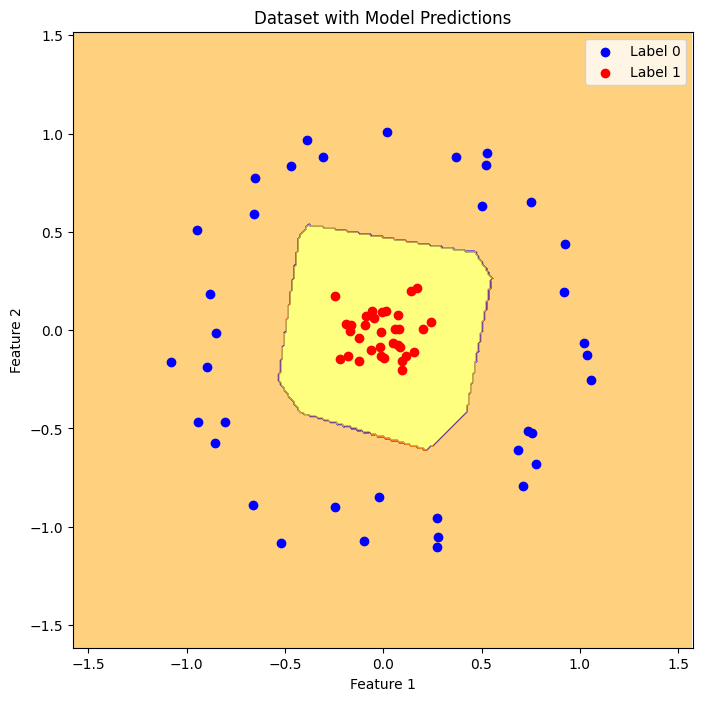

Epoch 710/1000, Loss: 0.017683008685708046
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


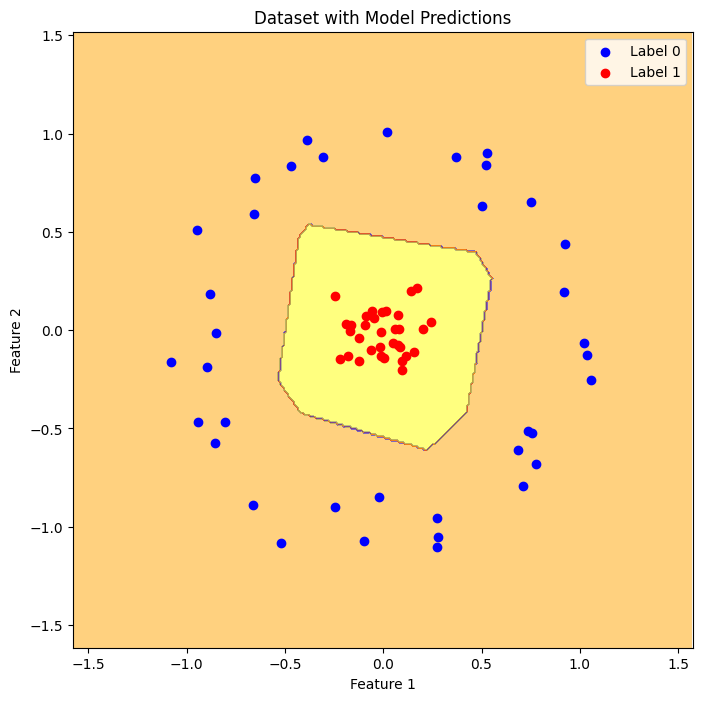

Epoch 720/1000, Loss: 0.0034960564225912094
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


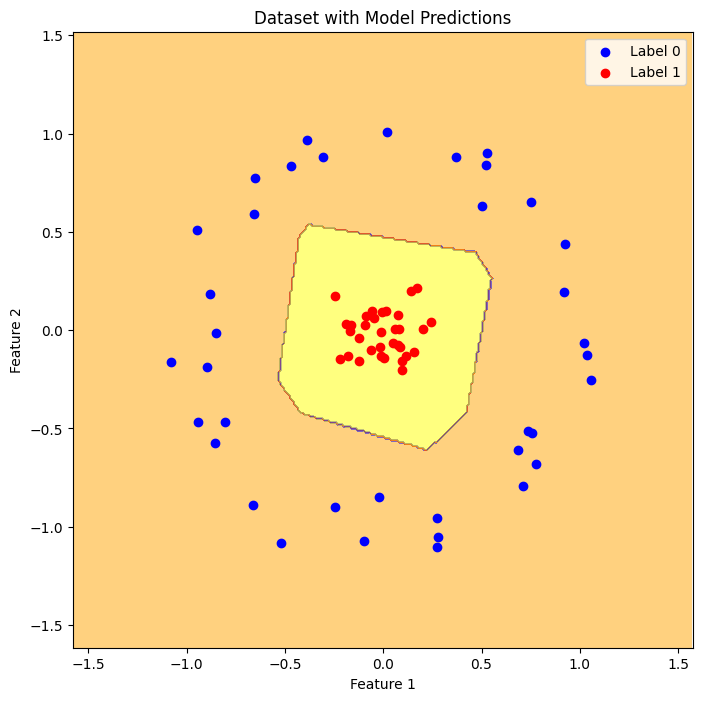

Epoch 730/1000, Loss: 0.012019486166536808
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


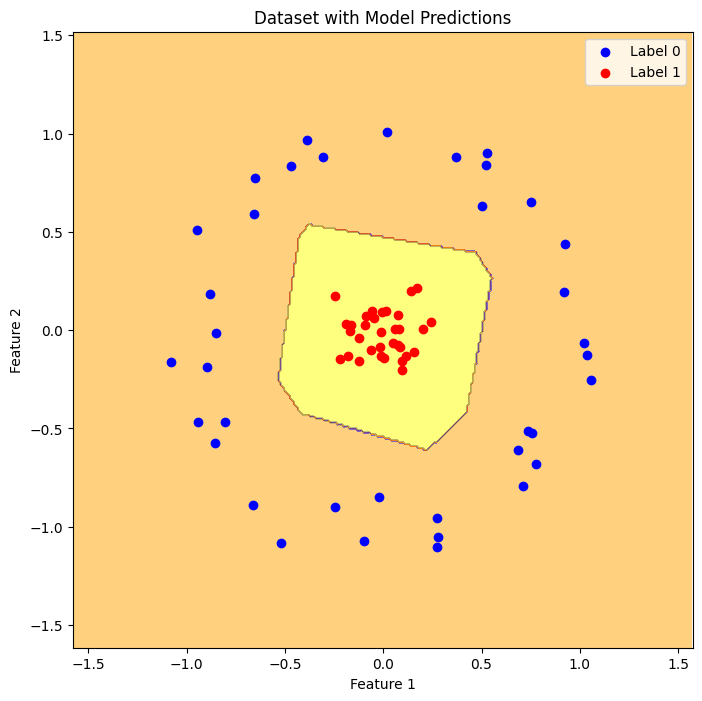

Epoch 740/1000, Loss: 0.00994941871613264
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


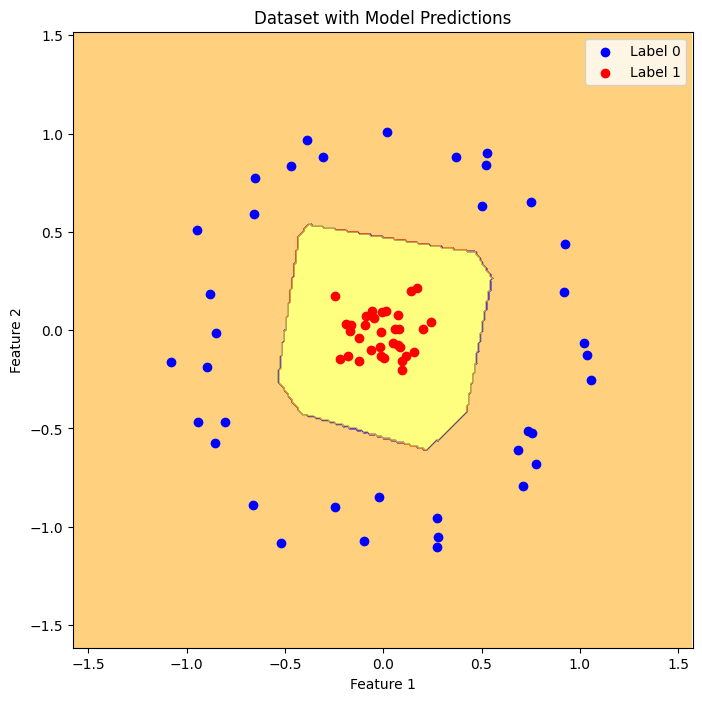

Epoch 750/1000, Loss: 0.00431812321767211
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


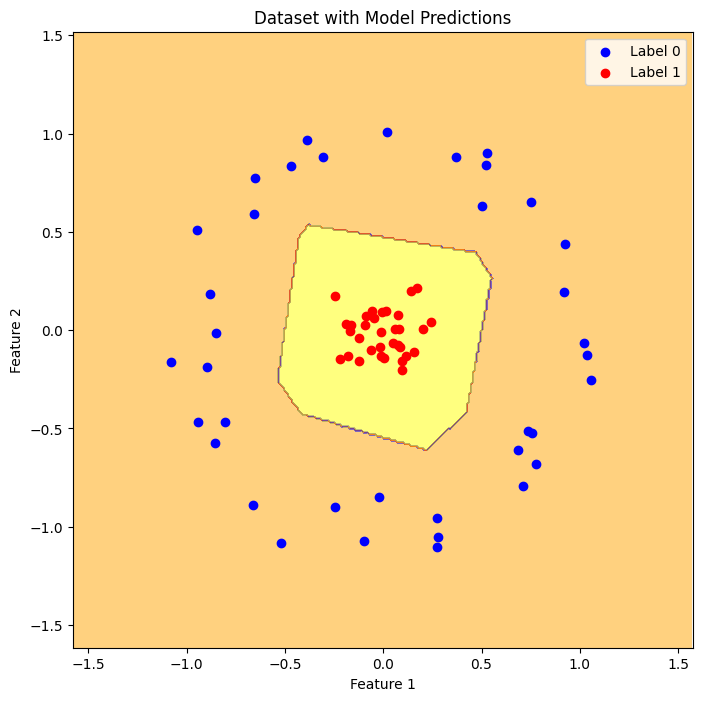

Epoch 760/1000, Loss: 0.01867261715233326
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


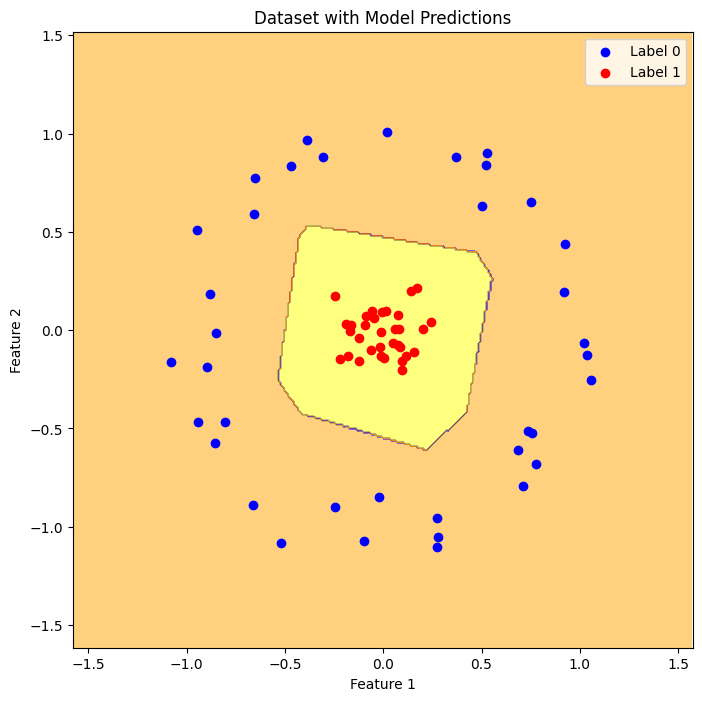

Epoch 770/1000, Loss: 0.014345616102218628
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


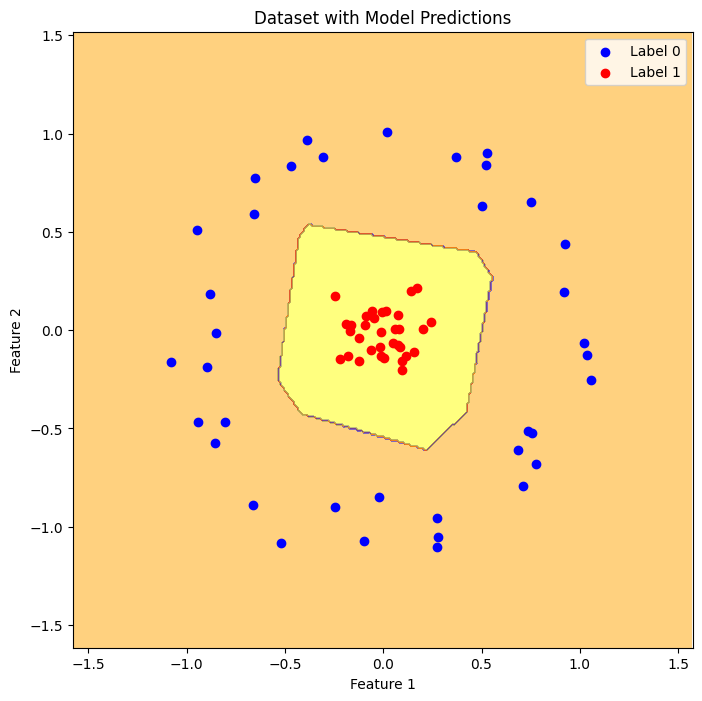

Epoch 780/1000, Loss: 0.012385395355522633
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


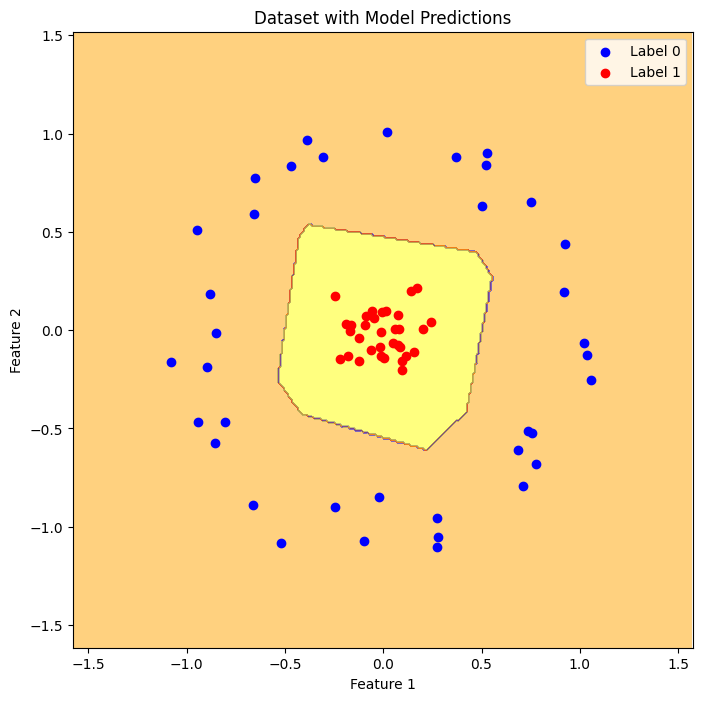

Epoch 790/1000, Loss: 0.002991124987602234
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


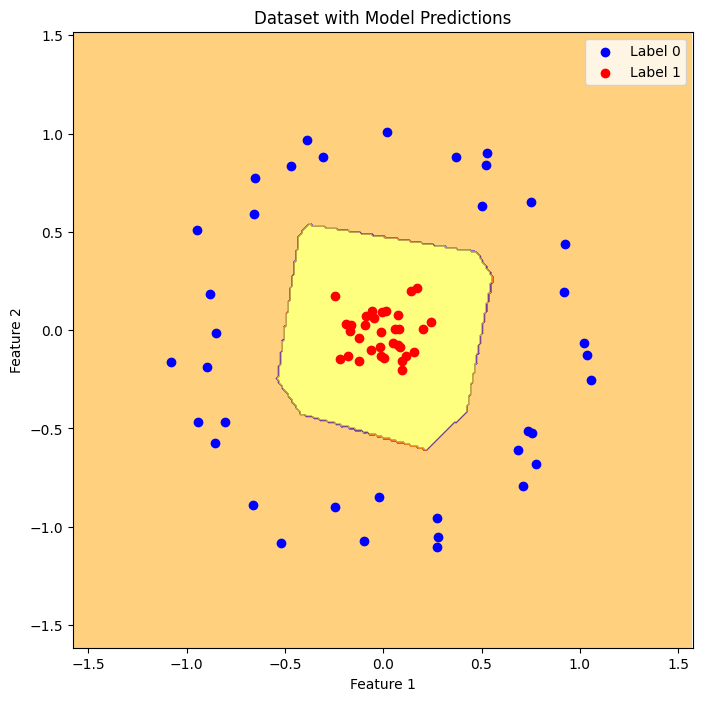

Epoch 800/1000, Loss: 0.007157549262046814
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


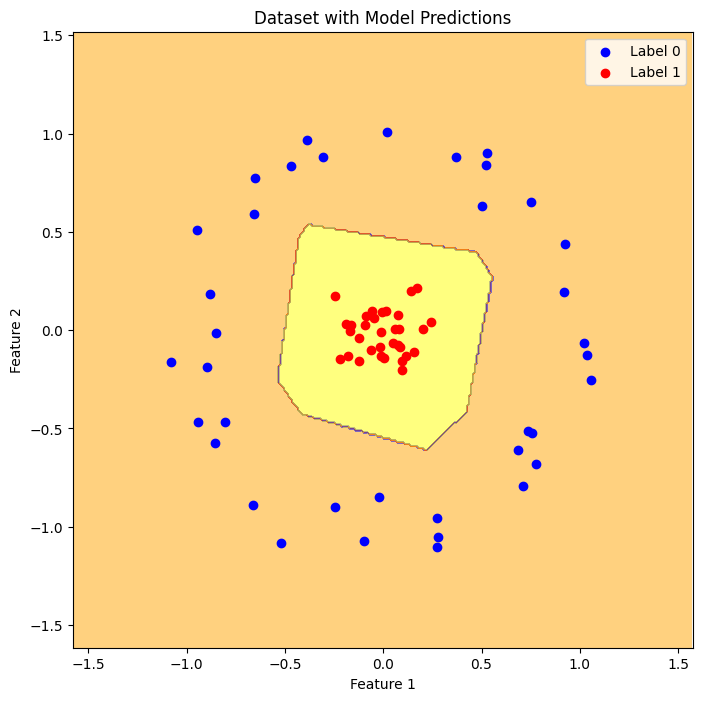

Epoch 810/1000, Loss: 0.010292069055140018
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


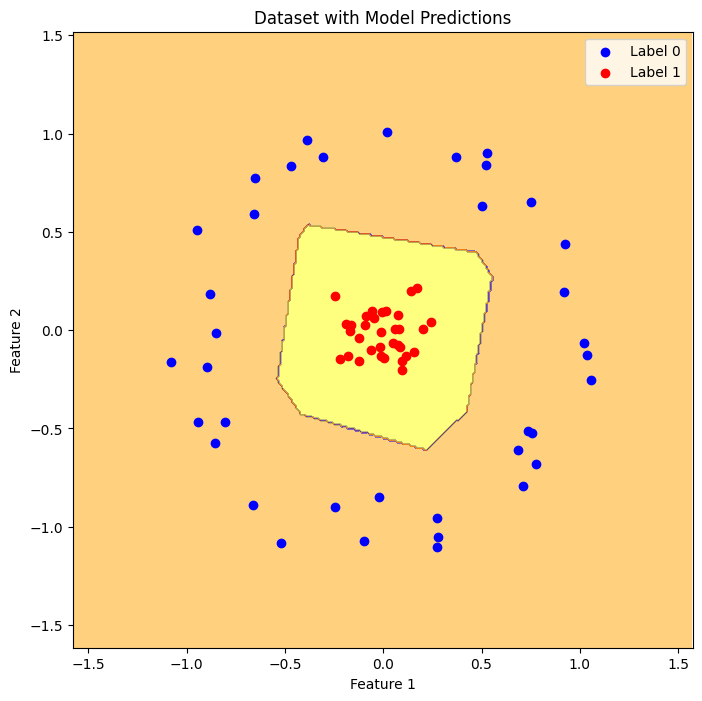

Epoch 820/1000, Loss: 0.011943965218961239
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


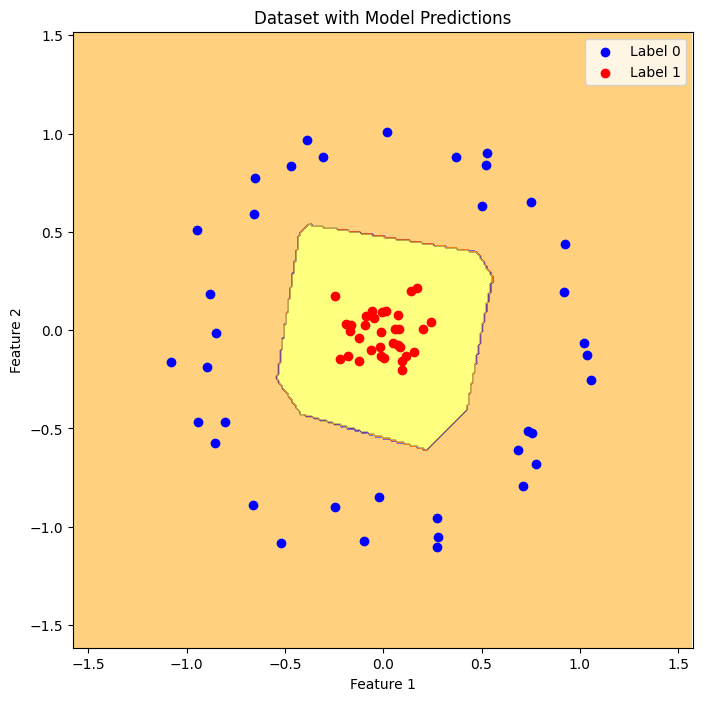

Epoch 830/1000, Loss: 0.00542232021689415
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


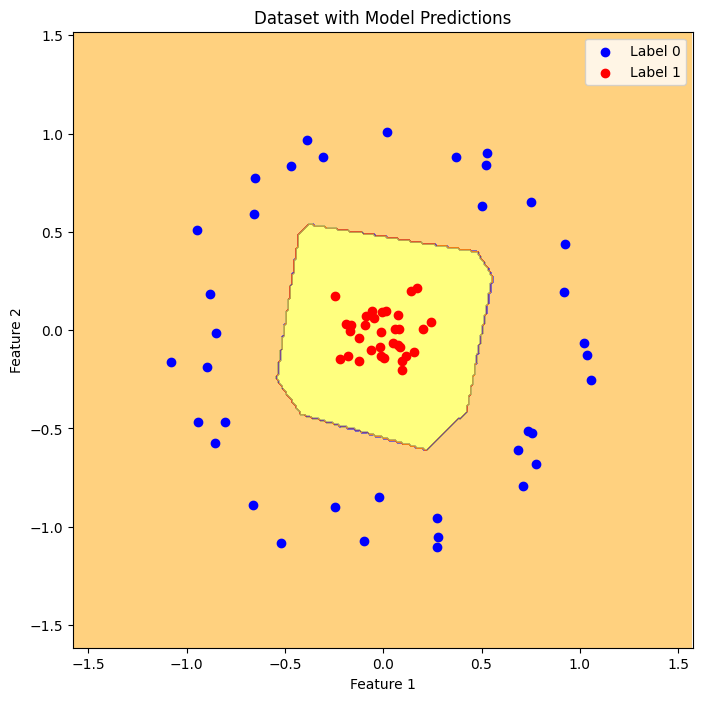

Epoch 840/1000, Loss: 0.0059333485551178455
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


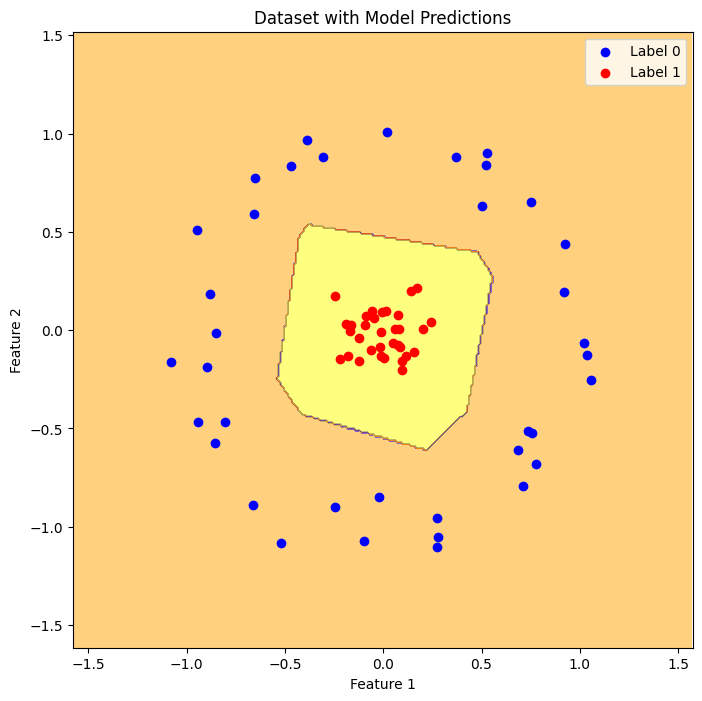

Epoch 850/1000, Loss: 0.005215049255639315
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


KeyboardInterrupt: 

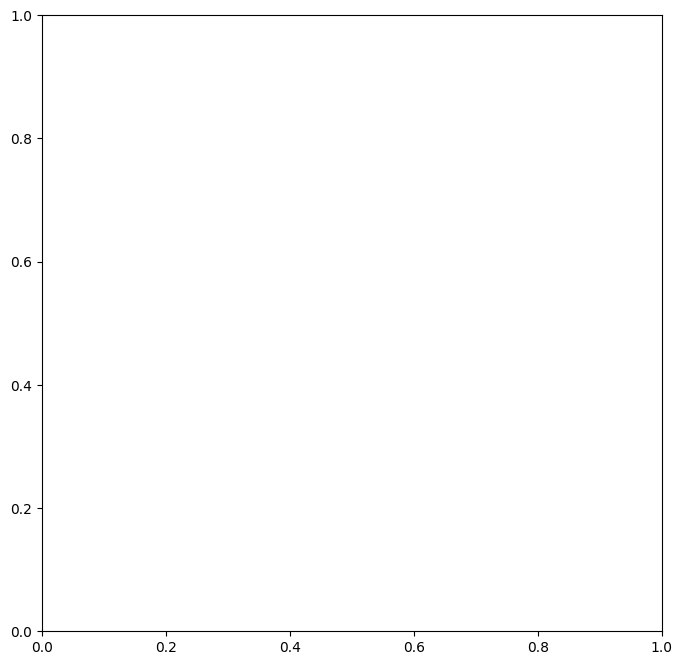

In [18]:
model = SimpleNN(7)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels[:,0].long())
        loss.backward()
        optimizer.step()

    if epoch % 10 == 9:
        plot_prediction_with_dataloader(model, train_loader)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


In [13]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs.data > 0.5).float()  # Convert probabilities to binary predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

test_accuracy = evaluate_model(model, test_loader)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 83.33%


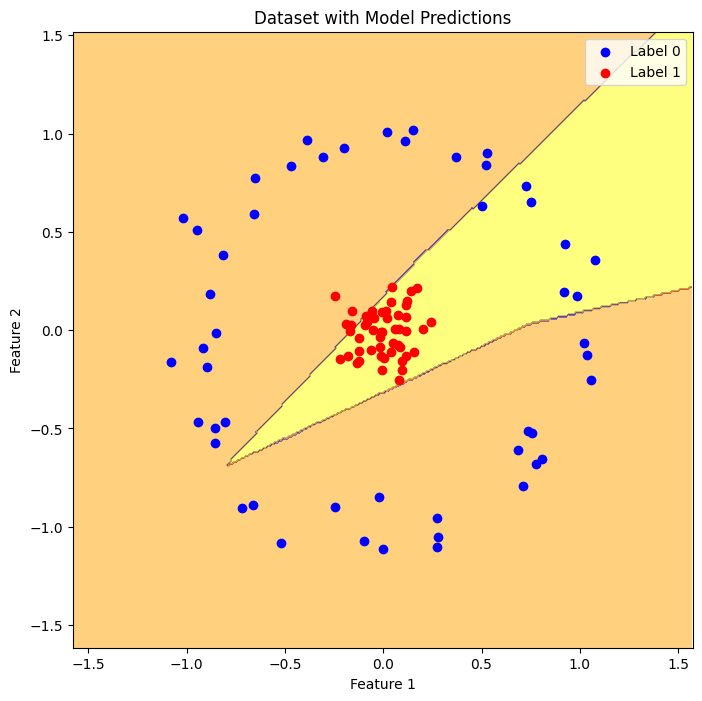

-1.5792590261098107 1.5755548382426503 -1.6157185184309293 1.5184304462088503


In [14]:
f0_min, f0_max = 0, 0 
f1_min, f1_max = 0, 0
def plot_data_with_predictions(model, features, labels):
    global f0_max, f0_min, f1_max, f1_min
    f0_min, f0_max = features[:, 0].min()-0.5, features[:, 0].max()+0.5
    f1_min, f1_max = features[:, 1].min()-0.5, features[:, 1].max()+0.5
    f0, f1 = np.meshgrid(np.arange(f0_min, f0_max, 0.01),
                         np.arange(f1_min, f1_max, 0.01))

    inputs = torch.Tensor(np.c_[f0.ravel(), f1.ravel()])
                         
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        outputs = outputs.argmax(dim=1)
        outputs = outputs.reshape(f0.shape)

    plt.figure(figsize=(8, 8))
        
    plt.contourf(f0, f1, outputs, alpha=0.5, colors=['orange','blue', 'yellow', 'red'])

    blue_points = features[labels == 0]
    red_points = features[labels == 1]

    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Label 0')
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Label 1')
    
    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(f0_min, f0_max)
    plt.ylim(f1_min, f1_max)
    plt.legend()
    plt.show()

plot_data_with_predictions(model, circles_data, circles_data_labels)
print(f0_min, f0_max, f1_min, f1_max)


(500, 500) (500, 500)


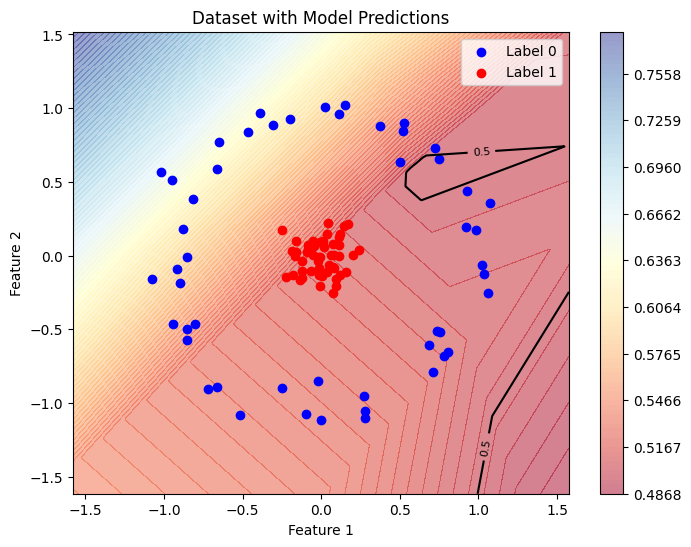

In [15]:
def plot_data_with_predictions(model, features, labels):

    global f0_max, f0_min, f1_max, f1_min
    x_min = f0_min
    x_max = f0_max
    y_min = f1_min
    y_max = f1_max

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    print(xx.shape, yy.shape)

    # Predict over the mesh grid
    model.eval()
    with torch.no_grad():
        Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z[:,0]
        Z = torch.sigmoid(Z)
        Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    # Use a continuous colormap to reflect probabilities or model scores
    contour = plt.contourf(xx, yy, Z, alpha=0.5, levels=np.linspace(Z.min(), Z.max(), 100), cmap='RdYlBu')
    plt.colorbar(contour)  # Add a colorbar to interpret the values

    # Add a black line where Z == 0.5, indicating the decision boundary
    contour_lines = plt.contour(xx, yy, Z, levels=[0.5], colors='black')
    plt.clabel(contour_lines, inline=True, fontsize=8, fmt='0.5')
    
    # Plot the original data points with labels
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', label='Label 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', label='Label 1')

    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(f0_min, f0_max)
    plt.ylim(f1_min, f1_max)
    plt.legend()
    plt.show()

plot_data_with_predictions(model, circles_data, circles_data_labels)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


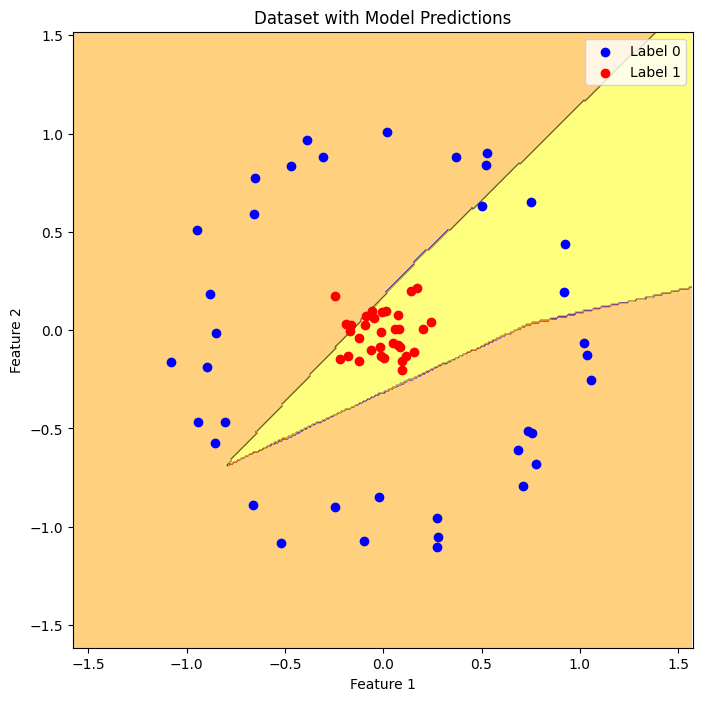

In [17]:
def plot_prediction_with_dataloader(model, dataloader):
    
    global f0_max, f0_min, f1_max, f1_min
    all_features = []
    all_labels = []
    
    # Iterate over the DataLoader to accumulate all features and labels
    for batch_features, batch_labels in dataloader:
        # Assuming features and labels are tensors, adjust if necessary
        all_features.append(batch_features.numpy())
        all_labels.append(batch_labels.numpy())

    # Concatenate all features and labels
    features = np.concatenate(all_features, axis=0)
    labels = np.concatenate(all_labels, axis=0).flatten()
    print(type(features))
    print(type(labels))
    print(features.shape)
    print(labels.shape)

    
    # Generate a mesh grid to plot decision boundary
    # x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    # y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1
    x_min = f0_min
    x_max = f0_max
    y_min = f1_min
    y_max = f1_max
    print(x_min)
                         
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the mesh grid
    model.eval()
    with torch.no_grad():
        Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.argmax(dim=1)
        Z = Z.reshape(xx.shape)

    # print(labels == 0)
    # Plot the contour and training examples
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, alpha=0.5, colors=['orange','blue', 'yellow', 'red'])
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', label='Label 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', label='Label 1')

    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(f0_min, f0_max)
    plt.ylim(f1_min, f1_max)
    plt.legend()
    plt.show()

plot_prediction_with_dataloader(model, train_loader)


In [28]:
# %matplotlib notebook
def plot_prediction_with_dataloader_continuely(model, dataloader):
    
    global f0_max, f0_min, f1_max, f1_min
    all_features = []
    all_labels = []
    
    # Iterate over the DataLoader to accumulate all features and labels
    for batch_features, batch_labels in dataloader:
        # Assuming features and labels are tensors, adjust if necessary
        all_features.append(batch_features.numpy())
        all_labels.append(batch_labels.numpy())

    # Concatenate all features and labels
    features = np.concatenate(all_features, axis=0)
    labels = np.concatenate(all_labels, axis=0).flatten()
    print(type(features))
    print(type(labels))
    print(features.shape)
    print(labels.shape)

    
    # Generate a mesh grid to plot decision boundary
    # x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    # y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1
    x_min = f0_min
    x_max = f0_max
    y_min = f1_min
    y_max = f1_max
    print(x_min)
                         
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the mesh grid
    model.eval()
    with torch.no_grad():
        Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.argmax(dim=1)
        Z = Z.reshape(xx.shape)

    # print(labels == 0)
    # Plot the contour and training examples
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, alpha=0.5, colors=['orange','blue', 'yellow', 'red'])
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', label='Label 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', label='Label 1')

    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(f0_min, f0_max)
    plt.ylim(f1_min, f1_max)
    plt.legend()
    plt.draw()
    plt.pause(1)  # Pause for 0.1 second
    # plt.clf()  # Clear the plot for the next iteration
    plt.show()
for ii in range(3):
    plot_prediction_with_dataloader_continuely(model, train_loader)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


<IPython.core.display.Javascript object>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


<IPython.core.display.Javascript object>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70, 2)
(70,)
-1.5792590261098107


<IPython.core.display.Javascript object>

KeyboardInterrupt: 